# Top Journal on Control
- 第一梯队
    - [IEEE Transactions on Automatic Control](https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=9)
    - [Automatica](https://www.sciencedirect.com/journal/automatica/)
    - [SIAM Journal on Control and Optimization](https://www.scimagojr.com/journalsearch.php?q=26405&tip=sid)
- 第二梯队
    - [Systems & Control Letters](https://www.sciencedirect.com/journal/systems-and-control-letters/)
    - [IEEE Transactions on Cybernetics](https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=6221036)
    - [International Journal of Control](https://www.tandfonline.com/journals/tcon20)
    - [International Journal of Robust and Nonlinear Control](https://onlinelibrary.wiley.com/journal/10991239?utm_medium=referral&utm_source=baidu_scholar&utm_campaign=RWA17109&utm_content=Global_Marketing_International_Journal_of_Robust_and_Nonlinear_Control)
    - [International Journal of Adaptive Control and Signal Processing](https://onlinelibrary.wiley.com/journal/10991115/?utm_medium=referral&utm_source=baidu_scholar&utm_campaign=RWA17109&utm_content=Global_Marketing_PS_International_Journal_of_Adaptive_Control_and_Signal_Processing)
    - IEEE Transactions on Circuits and Systems
    
refer to: 曹永岩教授 & [控制类SCI期刊（业界认可程度排名）](https://zhuanlan.zhihu.com/p/640192550?utm_id=0)

[Model Predictive Control: Theory, Computation, and Design](https://sites.engineering.ucsb.edu/~jbraw/mpc/)  
todo: https://www.do-mpc.com/en/latest/mhe_example.html

# LQR
linear–quadratic regulator/线性二次调节器

- MPC vs LQR: https://www.zhihu.com/question/591547395?utm_id=0

iLQR用迭代方法解决非线性问题，只是LQR的拓展

足式机器人用到很多非线性/不等式约束，能用iLQR去求解的原因是把原本存在于MPC的其他约束全部放在cost function里面了，好处是求解更快了，问题也可以堆的更大，所以适合水论文，坏处是系统鲁棒性变差了，你不知道它差的时候会有多差。

迭代线性二次调节器（iLQR）是一种基于最优控制理论的非线性控制算法。它通过迭代地线性化系统动态和二次化目标函数来解决最优控制问题

当预测时域趋于无穷且忽略约束时，MPC等价于LQR

MPC通常适用于具有明确控制目标和动态模型的问题，例如工业过程控制和无人驾驶汽车控制。  
而iLQR通常适用于需要在线计算控制策略的问题，例如机器人控制和飞行器控制


todo: [LQR与iLQR](https://zhuanlan.zhihu.com/p/91865627)  
[iterative LQR （iLQR）推导：从非线性问题到LQR](https://zhuanlan.zhihu.com/p/636317592)  

## 无限时域，连续可微的LQR
refer to: https://zhuanlan.zhihu.com/p/363033191  
考虑以下的连续时间线性系统
$$\dot{x} = Ax + Bu$$
其成本泛函为
$$J=\int_{0}^{\infty} \left( x^{T}Qx + u^{T}Ru + 2x^{T}Nu \right)dt$$

可以让成本最小化的回授控制律为
$$ u = -Kx $$
其中$K$定义为
$$ K = R^{-1} \left( B^{T}P + N^{T} \right)$$
而$P$是代数Riccati方程的解
$$ A^{T}P + PA - \left( PB + N \right) R^{-1} \left( B^{T}P + N^{T} \right) + Q = 0 $$
也可以写成下式
$$ \mathcal{A}^{T}P + P\mathcal{A} - PBR^{-1}B^{T}P + \mathcal{Q} = 0$$
其中
$$ \mathcal{A} = A - BR^{-1}N^{T} \qquad \mathcal{Q} = Q - NR^{-1}N^{T}$$

## 无限时域，离散的LQR
考虑离散时间的线性系统，定义如下
$$ x_{k+1} = Ax_{k} + Bu_{k} $$
其性能指标为
$$ J = \sum\limits_{k=0}^{\infty} \left( x_{k}^{T}Qx_{k} + u_{k}^{T}Ru_{k} + 2x_{k}^{T}Nu_{k} \right)$$

可以让性能指标最小化的最佳控制序列为
$$ u_{k} = - Fx_{k}$$
其中
$$ F = \left( R + B^{T}PB \right)^{-1} \left(B^{T}PA + N^{T} \right)$$
而$P$是离散代数Riccati方程(DARE)的唯一正定解。

$$ P = A^{T}PA - \left( A^{T}PB + N \right) \left( R + B^{T}PB \right)^{-1} \left( B^{T}PA + N^{T} \right) + Q$$
可以写成
$$ P = \mathcal{A}^{T}P\mathcal{A} - \mathcal{A}^{T}PB \left( R + B^{T}PB \right)^{-1} B^{T}P\mathcal{A} + \mathcal{Q} $$
其中
$$ \mathcal{A} = A - BR^{-1}N^{T} \qquad \mathcal{Q} = Q - NR^{-1}N^{T}$$
而求解代数Riccati方程的一个方式是迭代计算有限时间的动态Riccati方程，直到所得的解收敛为止。

### proof

$$ J(u) = \sum_{i=1}^{+\infty} \mathbf{x}(k+i)^T \cdot Q \cdot \mathbf{x}(k+i) + \mathbf{u}(k+i-1)^T \cdot R \cdot \mathbf{u}(k+i-1) \dots (1)$$
$$x(k+1)=Ax(k)+Bu(k) \dots (2)$$

$$\begin{array}{c,l}
\mathscr{F} = \min\limits_{\mathbf{u}} & \mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + \mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
subj. to & \dot{\mathbf{x}}_{[n_x \times 1]} = A^{'}_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B^{'}_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
\implies & \mathbf{x}(k+1)_{[n_x \times 1]} = A_{[n_x \times n_x]}\mathbf{x}(k)_{[n_x \times 1]} + B_{[n_x \times n_u]}\mathbf{u}(k)_{[n_u \times 1]} \\
\end{array} \\
\begin{align}
\implies \mathscr{F} & = \min_{\mathbf{u}} \mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\ 
& + \mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} +
\left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)_{[n_x \times 1]} \\
\implies \frac{d\mathscr{F}}{d\mathbf{u}} & = 
2 R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} + 
2 B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)_{[n_x \times 1]} = 0
\end{align}
$$

$$\begin{align}
\implies & R_{[n_u \times n_u]} \cdot \mathbf{u}^*_{[n_u \times 1]} + 
B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}^*_{[n_u \times 1]} \right)_{[n_x \times 1]} = 0 \\
\implies & R_{[n_u \times n_u]} \cdot \mathbf{u}^*_{[n_u \times 1]} + 
B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \mathbf{u}^*_{[n_u \times 1]} = -
B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
\implies & \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)_{[n_u \times n_u]} \cdot \mathbf{u}^*_{[n_u \times 1]} = - 
B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
\implies & \mathbf{u}^*_{[n_u \times 1]} = - \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot
B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
\implies & \mathbf{u}^* = - \left( R + B^T \cdot P \cdot B \right)^{-1} \cdot B^T \cdot P \cdot A \cdot \mathbf{x}
\end{align}$$

$$\begin{align}
\mathbf{u}^*_{[n_u \times 1]} & = - \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
(\mathbf{u}^*)^T_{[1 \times n_u]} & = - \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P^T_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1} \right)^{T}_{[n_u \times n_u]} \\
& = - \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P^T_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R^T_{[n_u \times n_u]} + \left( B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^T \right)^{-1}_{[n_u \times n_u]} \\
& \because R = R^T \quad and \quad P = P^Ｔ\\
& = - \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]}
\end{align}$$

Hamilton-Jacobi equation


$$\begin{align}
\mathbf{x}^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} & =
\mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + 
\mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
& + \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + 
\mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
& + \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \right)^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \right)_{[n_x \times 1]} + 
\left( B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)_{[n_x \times 1]} \\
& + 2\left( B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \right)^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \left( A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \right)_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + 
\mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
& + \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot  A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + 
\mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\ 
& + 2 \mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot Q_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} + 
\mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
& + \mathbf{u}^T_{[1 \times n_u]} \cdot R_{[n_u \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} + 
\mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \mathbf{u}_{[n_u \times 1]} \\
& + 2 \mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot \left( Q_{[n_x \times n_x]} + A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \right) \cdot \mathbf{x}_{[n_x \times 1]} \\
& + \mathbf{u}^T_{[1 \times n_u]} \cdot \left(R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right) \cdot \mathbf{u}_{[n_u \times 1]} \\
& + 2 \mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
\end{align}$$

$$\begin{align}
\mathbf{x}^T_{[1 \times n_x]} \cdot P_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} 
% & = \mathbf{x}^T_{[1 \times n_x]} \cdot \left( Q_{[n_x \times n_x]} + A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \right) \cdot \mathbf{x}_{[n_x \times 1]} \\
% & + \mathbf{u}^T_{[1 \times n_u]} \cdot \left(R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right) \cdot \mathbf{u}_{[n_u \times 1]} \\
% & + 2 \mathbf{u}^T_{[1 \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot \left( Q_{[n_x \times n_x]} + A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \right) \cdot \mathbf{x}_{[n_x \times 1]} \\
& + \left( \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \right)_{[1 \times n_u]} \\
& \qquad \cdot \left(R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right) \\
& \qquad \cdot \left( \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \right)_{[n_u \times 1]} \\
& - 2 \left( \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \right)_{[1 \times n_u]} \\
& \qquad \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
& = \mathbf{x}^T_{[1 \times n_x]} \cdot \left( Q_{[n_x \times n_x]} + A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \right) \cdot \mathbf{x}_{[n_x \times 1]} \\
& + \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\ 
& - 2 \mathbf{x}^T_{[1 \times n_x]} \cdot A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \cdot \mathbf{x}_{[n_x \times 1]} \\
\implies P_{[n_x \times n_x]} & = Q_{[n_x \times n_x]} + A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \\
& - A^T_{[n_x \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \cdot \left( R_{[n_u \times n_u]} + B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot B_{[n_x \times n_u]} \right)^{-1}_{[n_u \times n_u]} \cdot B^T_{[n_u \times n_x]} \cdot P_{[n_x \times n_x]} \cdot A_{[n_x \times n_x]} \\
\implies P & = Q + A^T \cdot P \cdot A - A^T \cdot P \cdot B \cdot \left( R + B^T \cdot P \cdot B \right)^{-1} \cdot B^T \cdot P \cdot A \\
\end{align}$$

## 有限时域，连续可微的LQR
方程式如下的连续时间线性系统，$t \in [t_0,t_1]$：
$$\dot{x} = Ax + Bu$$
其二次成本泛函为
$$J = x^{T}(t_{1})F(t_{1})x(t_{1}) + \int\limits_{t_{0}}^{t_{1}} \left( x^{T}Qx + u^{T}Ru + 2x^{T}Nu \right)dt$$
其中$F$、$Q$和$R$都是正定矩阵。

可以让成本最小化的回授控制律为
$$ u = -Kx $$
其中$K$为
$$ K = R^{-1} \left( B^{T}P(t) + N^{T} \right)$$
而$P$是连续时间Riccati方程的解：
$$ A^{T}P(t) + P(t)A - \left( P(t)B + N \right) R^{-1} \left( B^{T}P(t) + N^{T} \right) + Q = -\dot{P}(t)$$

边界条件如下
$$ P(t_{1}) = F(t_{1}) $$
$J_{min}$的一阶条件如下:
1. 状态方程  
$\dot{x} = Ax + Bu$
2. 协态方程  
$ -\dot{\lambda} = Qx + Nu + A^{T}\lambda $
3. 静止方程  
$ 0 = Ru + N^{T}x + B^{T}\lambda $
4. 边界条件  
$ x(t_{0}) = x_{0}$且$\lambda(t_{1}) = F(t_{1})x(t_{1})$

## 有限时域，离散的LQR
考虑离散时间的线性系统，定义如下
$$ x_{k+1} = Ax_{k} + Bu_{k} $$
其性能指标为
$$ J = x_{N}^{T}Qx_{N} + \sum\limits_{k=0}^{N - 1} \left( x_{k}^{T}Qx_{k} + u_{k}^{T}Ru_{k} + 2x_{k}^{T}Nu_{k} \right) $$

可以让性能指标最小化的最佳控制序列为
$$ u_{k} = -F_{k}x_{k} $$
其中
$$ F_{k} = \left( R + B^{T}P_{k+1}B \right)^{-1} \left( B^{T}P_{k+1}A + N^{T}\right)$$
而$P_{k}$是由动态Riccati方程倒退时间佚代计算而得
$$ P_{k-1} = A^{T}P_{k}A - \left( A^{T}P_{k}B + N \right) \left( R + B^{T}P_{k}B \right)^{-1} \left( B^{T}P_{k}A + N^{T} \right) + Q $$
从终端条件$P_{N} = Q$开始计算。注意$u_{N}$没有定义，因为$x$是由$ Ax_{N-1} + Bu_{N-1}$推导到其最终状态$x_{N}$。

# 纵向MPC
to read: [考虑非线性的system dynamics](https://zhuanlan.zhihu.com/p/637192643)

## 符号
公式符号 | code | 维度 | 描述
:-: | :-: | :-: | :-
$$\mathbf{x}$$ | $$x\_$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ | state vector, $\mathbf{x}(k)_{\left[n_x\ \times\ 1\right]}=\left[ \begin{matrix} s(k) \\ v(k) \end{matrix} \right], k = 0, 1, \dots, n_{steps}$ 
$$\mathbf{x}_{ref}$$ | $$x\_ref\_$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ | reference state
$$\mathbf{u}$$ | $$u\_$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ | control vector, $\mathbf{u}(k)_{\left[n_u\ \times\ 1\right]}=\left[ \begin{matrix} a(k) \end{matrix} \right], k = 0, 1, \dots, n_{steps} - 1$
$$Q$$ | $$Q\_$$ | $$n_x\times n_x$$ | the stage cost matrix for the state, assumed diagonal
$$Q_{terminal}$$ | $$Q\_terminal\_$$ | $$n_x\times n_x$$ | the terminal cost matrix for the state
$$R$$ | $$R\_$$ | $$n_u\times n_u$$ | the stage cost matrix for the control, assumed diagonal
$$\dot{R}$$ | $$R\_dot\_$$ | $$n_u\times n_u$$ | the stage cost matrix for the control rate, assumed diagonal
$$n_{steps}$$ | $$n\_steps\_$$ | - | number of MPC finite horizon steps
$$n_x$$ | $$n\_x\_$$ | - | 状态变量的维度/state dimension
$$n_u$$ | $$n\_u\_$$ | - | 控制变量的维度/controllable input dimension
$$n_\dot{u}$$ | $$n\_u\_dot\_$$ | - | controlllable input rate dimension
$$\mathbf{u}_{prev}$$ | $$u\_prev\_$$ | $$n_u \times 1$$ | the control applied in the previous planning cycle.
$$dt$$ | $$dt\_$$ | - | sampling time between steps of the MPC time horizon, unit: s
$$dt_{prev}$$ | $$dt\_prev\_$$ | - | the time elapsed from the previous planning cycle, unit: s
 | - | - | -
$$\mathbf{x}_{init}$$ | $$x\_init\_$$ | $$n_x \times 1$$ | 当前的状态变量/initial state
$$A_d$$ | $$A\_d\_$$ | $$n_x \times n_x$$ | $$A_d = I + A_c \cdot dt = \left[ \begin{matrix} 1 & dt\\ 0 & 1\end{matrix}\right], A_c = \left[ \begin{matrix} 0 & 1\\ 0 & 0\end{matrix}\right]$$
$$B_d$$ | $$B\_d\_$$ | $$n_x \times n_u$$ | $$B_d = B_c \cdot dt = \left[ \begin{matrix} 0 \\ dt \end{matrix}\right], B_c = \left[ \begin{matrix} 0 \\ 1 \end{matrix}\right]$$
 | - | - | -
$$\mathbf{x}_{lb,\ stiff}$$ | $$x\_bounds\_stiff\_.first$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{x}_{ub,\ stiff}$$ | $$x\_bounds\_stiff\_.second$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{u}_{lb,\ stiff}$$ | $$u\_bounds\_stiff\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{u}_{ub,\ stiff}$$ | $$u\_bounds\_stiff\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{lb,\ stiff}$$ | $$u\_dot\_bounds\_stiff\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{ub,\ stiff}$$ | $$u\_dot\_bounds\_stiff\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{x}_{lb,\ soft}$$ | $$x\_bounds\_soft\_.first$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{x}_{ub,\ soft}$$ | $$x\_bounds\_soft\_.second$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{u}_{lb,\ soft}$$ | $$u\_bounds\_soft\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{u}_{ub,\ soft}$$ | $$u\_bounds\_soft\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{lb,\ soft}$$ | $$u\_dot\_bounds\_soft\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{ub,\ soft}$$ | $$u\_dot\_bounds\_soft\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
 | - | - | -
$$\mathbf{x}_{lb,\ hard}$$ | $$x\_bounds\_hard\_.first$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{x}_{ub,\ hard}$$ | $$x\_bounds\_hard\_.second$$ | $$\left(n_x \cdot (n_{steps} + 1)\right)\times 1$$ |
$$\mathbf{u}_{lb,\ hard}$$ | $$u\_bounds\_hard\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{u}_{ub,\ hard}$$ | $$u\_bounds\_hard\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{lb,\ hard}$$ | $$u\_dot\_bounds\_hard\_.first$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |
$$\mathbf{\dot{u}}_{ub,\ hard}$$ | $$u\_dot\_bounds\_hard\_.second$$ | $$\left(n_u \cdot n_{steps}\right)\times 1$$ |

## 纵向MPC模型

$\begin{array}{c,l,l}
\mbox{min} & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1}\left[\left(\mathbf{x}(k)-\mathbf{x}_{ref}(k)\right)^T Q_{\left[n_x\ \times\ n_x\right]} \left(\mathbf{x}(k)-\mathbf{x}_{ref}(k)\right) + \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k)\right]& \\
& + \frac{1}{2} \left( \mathbf{x}(n_{steps})-\mathbf{x}_{ref}(n_{steps}) \right)^T Q_{terminal} \left( \mathbf{x}(n_{steps})-\mathbf{x}_{ref}(n_{steps}) \right) & \\
& + \frac{1}{2}\left(\frac{\mathbf{u}(0) - \mathbf{u}_{prev}}{dt_{prev}}\right)^T \dot{R} \left(\frac{\mathbf{u}(0) - \mathbf{u}_{prev}}{dt_{prev}}\right) + \frac{1}{2}\sum_{k=1}^{n_{steps}\  - 1}\left[ \left(\frac{\mathbf{u}(k) - \mathbf{u}(k-1)}{dt}\right)^T \dot{R} \left(\frac{\mathbf{u}(k) - \mathbf{u}(k-1)}{dt}\right) \right] & \\
% & + \sum_0^{N - 1} [w\_s\_xu^T \cdot s\_xu^2(k)] & \\
\mbox{subject to} & \mathbf{x}(0) = \mathbf{x}_{init} & \\
& \mathbf{x}(k+1)_{\left[n_x\ \times\ 1\right]} = {A_d}_{\left[n_x\ \times\ n_x\right]} \cdot \mathbf{x}(k)_{\left[n_x\ \times\ 1\right]} + {B_d}_{\left[n_x\ \times\ n_u\right]} \cdot\mathbf{u}(k)_{\left[n_u\ \times\ 1\right]}, k = 0, 1, 2, \dots, n_{steps} -1 & \\
& \mathbf{x}_{lb,\ stiff}(k) \leq \mathbf{x}(k) \leq \mathbf{x}_{ub,\ stiff}(k) & \\
& \mathbf{u}_{lb,\ stiff}(k) \leq \mathbf{u}(k) \leq \mathbf{u}_{ub,\ stiff}(k) & \\
& \mathbf{\dot{u}}_{lb,\ stiff}(k) \leq \mathbf{\dot{u}}(k) \leq \mathbf{\dot{u}}_{ub,\ stiff}(k) & \\
& \mathbf{x}_{lb,\ soft}(k) \leq \mathbf{x}(k) \leq \mathbf{x}_{ub,\ soft}(k) & \\
& \mathbf{u}_{lb,\ soft}(k) \leq \mathbf{u}(k) \leq \mathbf{u}_{ub,\ soft}(k) & \\
& \mathbf{\dot{u}}_{lb,\ soft}(k) \leq \mathbf{\dot{u}}(k) \leq \mathbf{\dot{u}}_{ub,\ soft}(k) & \\
& \mathbf{x}_{lb,\ hard}(k) \leq \mathbf{x}(k) \leq \mathbf{x}_{ub,\ hard}(k) & \\
& \mathbf{u}_{lb,\ hard}(k) \leq \mathbf{u}(k) \leq \mathbf{u}_{ub,\ hard}(k) & \\
& \mathbf{\dot{u}}_{lb,\ hard}(k) \leq \mathbf{\dot{u}}(k) \leq \mathbf{\dot{u}}_{ub,\ hard}(k) & \\
\end{array}$

## 目标函数

$\begin{array}{r,c,l}
& & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1}\left[\left(\mathbf{x}(k)-\mathbf{x}_{ref}(k)\right)^T Q_{\left[n_x\ \times\ n_x\right]} \left(\mathbf{x}(k)-\mathbf{x}_{ref}(k)\right) + \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k)\right] \\ 
& + & \frac{1}{2} \left( \mathbf{x}(n_{steps})-\mathbf{x}_{ref}(n_{steps}) \right)^T Q_{terminal} \left( \mathbf{x}(n_{steps})-\mathbf{x}_{ref}(n_{steps}) \right) \\ 
& + & \frac{1}{2}\left(\frac{\mathbf{u}(0) - \mathbf{u}_{prev}}{dt_{prev}}\right)^T \dot{R} \left(\frac{\mathbf{u}(0) - \mathbf{u}_{prev}}{dt_{prev}}\right) + \frac{1}{2}\sum_{k=1}^{n_{steps}\  - 1}\left[ \left(\frac{\mathbf{u}(k) - \mathbf{u}(k-1)}{dt}\right)^T \dot{R} \left(\frac{\mathbf{u}(k) - \mathbf{u}(k-1)}{dt}\right) \right] \\
\implies & & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) -
\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) +
\frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}_{ref}(k) \\ 
& + & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k) \\ 
& + & \frac{1}{2} \mathbf{x}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) -
\mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) +
\frac{1}{2} \mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}_{ref}(n_{steps}) \\ 
& + & \frac{1}{2 \cdot dt_{prev}^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) -
\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}(0) +
\frac{1}{2 \cdot dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}_{prev} \\ 
& + & \frac{1}{2 \cdot dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) -
\frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k) +
\frac{1}{2 \cdot dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k-1) \\
\implies & & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) +
\frac{1}{2} \mathbf{x}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) \\ 
& + & \frac{1}{2}\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k) +
\frac{1}{2 \cdot dt_{prev}^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) +
\frac{1}{2 \cdot dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) +
\frac{1}{2 \cdot dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k-1) \\ 
& - & \frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k) \\ 
& - & \sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) -
\mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) -
\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}(0) \\
\implies & & \frac{1}{2}\left[\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) +
\mathbf{x}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps})\right] \\ 
& + & \frac{1}{2}\left[\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k) +
\frac{1}{dt_{prev}^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) +
\frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) +
\frac{1}{dt^2}\sum_{k=0}^{n_{steps}\  - 2} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k)\right] \\ 
& - & \frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k) \\ 
& - & \sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) -
\mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) -
\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}(0) \\
\implies & & \frac{1}{2}\left[\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) +
\mathbf{x}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps})\right] \\ 
& + & \frac{1}{2}\left[
\mathbf{u}(0)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(0) +
\sum_{k = 1}^{n_{steps}\  - 2} \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k) +
\mathbf{u}(n_{steps}\  - 1)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(n_{steps}\  - 1) +
\frac{1}{dt_{prev}^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) \\
\qquad + \frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 2} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) +
\frac{1}{dt^2}\mathbf{u}(n_{steps}\  - 1)^T \dot{R} \mathbf{u}(n_{steps}\  - 1) +
\frac{1}{dt^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) +
\frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 2} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k)
\right] \\ 
& - & \frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k) \\ 
& - & \sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) -
\mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) -
\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}(0) \\
\end{array}$

$\begin{array}{r,c,l}
\implies & & \frac{1}{2}\left[\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) +
\mathbf{x}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps})\right] \\ 
& + & \frac{1}{2}\left[
\mathbf{u}(0)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(0) +
\frac{1}{dt_{prev}^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) +
\frac{1}{dt^2}\mathbf{u}(0)^T \dot{R} \mathbf{u}(0) \\
\quad + \sum_{k = 1}^{n_{steps}\  - 2} \mathbf{u}(k)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(k) +
\frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 2} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) +
\frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 2} \mathbf{u}(k)^T \dot{R} \mathbf{u}(k) \\
\quad + \mathbf{u}(n_{steps}\  - 1)^T R_{\left[n_u\ \times\ n_u\right]} \mathbf{u}(n_{steps}\  - 1) +
\frac{1}{dt^2}\mathbf{u}(n_{steps}\  - 1)^T \dot{R} \mathbf{u}(n_{steps}\  - 1)
\right] \\
& - & \frac{1}{dt^2}\sum_{k=1}^{n_{steps}\  - 1} \mathbf{u}(k-1)^T \dot{R} \mathbf{u}(k) \\
& - & \sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]} \mathbf{x}(k) -
\mathbf{x}_{ref}(n_{steps})^T Q_{terminal} \mathbf{x}(n_{steps}) -
\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R} \mathbf{u}(0) \\
\implies & & \frac{1}{2}\left[\sum_{k = 0}^{n_{steps}\  - 1} \mathbf{x}(k)^T \color{Red}{Q_{\left[n_x\ \times\ n_x\right]}} \mathbf{x}(k) +
\mathbf{x}(n_{steps})^T \color{Red}{Q_{terminal}} \mathbf{x}(n_{steps}) \right]
\\ & + & \frac{1}{2}\left\{
\mathbf{u}(0)^T \left[\color{Red}{R_{\left[n_u\ \times\ n_u\right]} + \left(\frac{1}{dt_{prev}^2} + \frac{1}{dt^2}\right)\dot{R}}\right] \mathbf{u}(0) +
\sum_{k = 1}^{n_{steps}\  - 2} \mathbf{u}(k)^T \left[ \color{Red}{ R_{\left[n_u\ \times\ n_u\right]} + \frac{2}{dt^2}\dot{R} } \right] \mathbf{u}(k) \\
\qquad + \mathbf{u}(n_{steps}\  - 1)^T \left[\color{Red}{ R_{\left[n_u\ \times\ n_u\right]} + \frac{1}{dt^2}\dot{R} }\right] \mathbf{u}(n_{steps}\  - 1) \right\} \\ 
& + & \frac{1}{2}\sum_{k=1}^{n_{steps}\  - 1} 2 \cdot \mathbf{u}(k-1)^T \cdot \color{Green}{\frac{\dot{-R}}{dt^2}} \cdot \mathbf{u}(k) \\ 
& - & \sum_{k = 0}^{n_{steps}\  - 1}  \color{Blue}{\mathbf{x}_{ref}(k)^T Q_{\left[n_x\ \times\ n_x\right]}} \mathbf{x}(k) -
\color{Blue}{\mathbf{x}_{ref}(n_{steps})^T Q_{terminal}} \mathbf{x}(n_{steps}) -
\color{Blue}{\frac{1}{dt_{prev}^2} \mathbf{u}_{prev}^T \dot{R}} \mathbf{u}(0)
\end{array}$

## $Q_{terminal}$ 理论依据

<!-- 使用末期惩罚权重提供 LQR 性能 -->
### [Provide LQR Performance Using Terminal Penalty Weights](https://www.mathworks.com/help/mpc/ug/using-terminal-penalty-to-provide-lqr-performance.html)
- 是什么?
<!-- $Q_p$ is a terminal penalty weight applied at the final prediction horizon step, and the prediction and control horizons are equal (p = m). The required $Q_p$ is the Riccati matrix calculated using the lqr or lqry commands. -->
&emsp;&emsp;$Q_{terminal}$是**在预测范围的最后一步上添加的末期惩罚权重，它是LQR计算得到的Riccati矩阵**。

- 作用
<!-- It is possible to make a finite-horizon model predictive controller equivalent to an infinite-horizon linear quadratic regulator (LQR) by setting tuning weights on the terminal predicted states. -->
&emsp;&emsp;**通过在末期预测状态上设置调整权重，使有限时域的模型预测控制器**(MPC)**等效于无穷时域的线性二次调节器**(LQR)。

### [Terminal Weights and Constraints](https://ww2.mathworks.cn/help/mpc/ug/terminal-weights-and-constraints.html)
**概念**

<!-- // Terminal weights are the quadratic weights $W_y$ on $y(t+p)$ and $W_u$ on $u(t + p – 1)$. The variable $p$ is the prediction horizon. You apply the quadratic weights at time $k + p$ only, such as the prediction horizon’s final step. Using terminal weights, you can achieve infinite horizon control that guarantees closed-loop stability. However, before using terminal weights, you must distinguish between problems with and without constraints. -->
&emsp;&emsp;末期权重是$y(t+p)$的二次权重$W_y$和 $u(t + p – 1)$的二次权重$W_u$。变量$p$是预测范围。仅在时间$k +p$时使用二次权重，例如预测范围的最后一步。使用末期权重，可以实现无穷时域的控制，保证闭环稳定性。但是，在使用末期权重之前，必须区分有约束和无约束的问题。

<!-- Terminal constraints are the constraints on $y(t + p)$ and $u(t + p – 1)$, where $p$ is the prediction horizon. You can use terminal constraints as an alternative way to achieve closed-loop stability by defining a terminal region. -->
&emsp;&emsp;末期约束是对$y(t + p)$和$u(t + p – 1)$的约束，其中$p$是预测范围。使用末期约束是通过定义末期区域，实现闭环稳定性的另一种方法。

-----------------------------------------------------------------------------------------------------------------
**计算**  

<!-- For the relatively simple unconstrained case, a terminal weight can make the finite-horizon model predictive controller behave as if its prediction horizon were infinite. For example, the MPC controller behavior is identical to a linear-quadratic regulator (LQR). The standard LQR derives from the cost function: -->
&emsp;&emsp;对于相对简单的无约束情况，末期权重可以使有限时域的模型预测控制器表现得好像其预测时域是无限的。例如，MPC控制器的行为与线性二次调节器(LQR)相同。标准LQR的成本函数：
$$ J(u) = \sum_{i=1}^{+\infty} \mathbf{x}(k+i)^T \cdot Q \cdot \mathbf{x}(k+i) + \mathbf{u}(k+i-1)^T \cdot R \cdot \mathbf{u}(k+i-1) \cdots (1)$$
<!-- where $x$ is the vector of plant states in the standard state-space form: -->
其中，$x$是标准状态空间形式的设备状态变量：
$$\mathbf{x}(k+1)=A\mathbf{x}(k)+B\mathbf{u}(k) \cdots (2)$$

<!-- The LQR provides nominal stability provided matrices $Q$ and $R$ meet certain conditions. You can convert the LQR to a finite-horizon form as follows: -->
&emsp;&emsp;只要矩阵$Q$和$R$满足一定条件，LQR就能提供标称稳定性。可以将LQR转换为有限时域形式，如下所示：
$$ J(u) = \sum_{i=1}^{p-1} \left[ \mathbf{x}(k+i)^T \cdot Q \cdot \mathbf{x}(k+i) + \mathbf{u}(k+i-1)^T \cdot R \cdot \mathbf{u}(k+i-1) \right] + \mathbf{x}(k+p)^T \cdot Q_p \cdot \mathbf{x}(k+p) \cdots (3)$$
<!-- where $Q_p$, the terminal penalty matrix, is the solution of the Riccati equation: -->
其中，$Q_p$，末期惩罚矩阵，是Riccati方程的解：
$$ Q_p = A^T \cdot Q_p \cdot A - A^T \cdot Q_p \cdot B \cdot (B^T \cdot Q_p \cdot B + R)^{-1} \cdot B^T \cdot Q_p \cdot A + Q \cdots (4)$$
公式(4)的推导参见[`无限时域，离散的LQR`](#无限时域，离散的LQR)

-----------------------------------------------------------------------------------------------------------------
**注意细节**

<!-- In general, $Q_p$ is a full (symmetric) matrix. You cannot use the Standard Cost Function to implement the LQR cost function. The only exception is for the first $p-1$ steps if $Q$ and $R$ are diagonal matrices. Also, you cannot use the alternative cost function because it employs identical weights at each step in the horizon. Thus, by definition, the terminal weight differs from those in steps 1 to $p-1$. Instead, use the following steps: -->
&emsp;&emsp;一般来说，$Q_p$ 是一个满秩(对称)矩阵。不能使用[标准成本函数](https://ww2.mathworks.cn/help/mpc/ug/optimization-problem.html#bujxvp9-9)以实现 LQR 成本函数。唯一的例外是对于前$p-1$步，$Q$和$R$是对角矩阵。此外，不能使用[替代成本函数](https://ww2.mathworks.cn/help/mpc/ug/optimization-problem.html#bujxw9t)，因为**它在范围内的每个步长都需要采用相同的权重**。因此，根据定义，末期权重不同于第1步到第$p-1$步的权重。而是，使用以下步骤：

<!-- Augment the model (Equation 2) to include the weighted terminal states as auxiliary outputs: -->
1. 增强模型(方程 2)以包含加权末期状态作为辅助输出：$y_{aug}(k) = Q_c x(k)$<br>
<!-- where $Q_c$ is the Cholesky factorization of $Q_p$ such that $Q_p = Q_c^T Q_c$. -->
其中,$Q_c$是$Q_p$的Cholesky因式分解，使得$Q_p = Q_c^T Q_c$。

<!-- Define the auxiliary outputs yaug as unmeasured, and specify zero weight to them. -->
2. 将辅助输出$y_{aug}$定义为未测量，并为其指定零权重。

<!-- Specify unity weight on yaug at the last step in the prediction horizon using setterminal. -->
3. 使用`setterminal`在预测范围的最后一步上指定$y_{aug}$的统一权重。
 
<!-- To make the model predictive controller entirely equivalent to the LQR, use a control horizon equal to the prediction horizon. In an unconstrained application, you can use a short horizon and still achieve nominal stability. Thus, the horizon is no longer a parameter to be tuned. -->
&emsp;&emsp;**为了使模型预测控制器完全等效于 LQR，控制范围需要与预测范围相同**。**在一个无约束的应用中，可以使用短时间范围，仍能实现标称稳定性**。因此，时域不再是需要调整的参数。

<!-- When the application includes constraints, the horizon selection becomes important. The constraints, which are usually softened, represent factors not considered in the LQR cost function. If a constraint becomes active, the control action deviates from the LQR (state feedback) behavior. If this behavior is not handled correctly in the controller design, the controller may destabilize the plant. -->
&emsp;&emsp;**当应用包含约束时，时域的选择就变得很重要**。这些约束，通常是软的，表示 LQR 成本函数中未考虑的因素。如果约束被激活动，控制操作就会偏离LQR(状态反馈)行为。如果在控制器设计中没有正确处理这种行为，控制器可能会破坏设备的稳定性。

<!-- For an in-depth discussion of design issues for constrained systems see [1]. Depending on the situation, you might need to include terminal constraints to force the plant states into a defined region at the end of the horizon, after which the LQR can drive the plant signals to their targets. Use setterminal to add such constraints to the controller definition. -->
&emsp;&emsp;关于有约束系统设计问题的深入讨论，请参阅《[Model Predictive Control: Theory and Design](https://sites.engineering.ucsb.edu/~jbraw/mpc/)》。 根据情况选择是否包含末期约束，以强制设备状态达到时域末端的定义区域，之后 LQR 可以驱动设备信号到其目标。使用`setterminal`将此类约束添加到控制器定义中。

<!-- The standard (finite-horizon) model predictive controller provides comparable performance, if the prediction horizon is long. You must tune the other controller parameters (weights, constraint softening, and control horizon) to achieve this performance. -->
&emsp;&emsp;如果预测范围很长，标准(有限时域)模型预测控制器可以提供客观的性能。必须调整其他控制器参数(权重、约束软化和控制范围)才能实现此性能。

## 离散化

continuous state space model: $$\dot{\mathbf{x}} = A_c\mathbf{x} + B_c\mathbf{u} + C_c$$

discrete state space model: $$\mathbf{x}(k+1) = A_d\mathbf{x}(k) + B_d\mathbf{u}(k) + C_d$$

离散方法 | 拉普拉斯变换 | $$A_d$$ | $$B_d$$ | $$C_d$$ 
:- | :-: | :-: | :-: | :-: 
前向欧拉 | $$\frac{z-1}{dt}$$ | $$A_d = I + A_c dt$$ | $$B_d = B_c dt$$ | $$C_d = C_c dt$$  
后向后拉 | $$\frac{1-z^{-1}}{dt}$$ | $$A_d = \left( I - A_c dt \right)^{-1}$$ | $$B_d = \left( I - A_c dt \right)^{-1}B_c dt$$ | $$C_d = \left( I - A_c dt \right)^{-1}C_c dt$$
双线性变换 | $$\frac{2}{dt}\cdot\frac{z-1}{z+1}$$ | $$\left( I - A_c \frac{dt}{2} \right)^{-1}\left( I + A_c \frac{dt}{2} \right)$$ | $$B_d = \left( I - A_c \frac{dt}{2} \right)^{-1}B_c dt$$ | $$C_d = \left( I - A_c \frac{dt}{2} \right)^{-1}C_c dt$$

- 双线性变化  
$A_d = \frac{e^{\frac{AT}{2}}}{e^{\frac{-AT}{2}}} = \frac{I+\frac{AT}{2}}{I-\frac{AT}{2}} = \left(I-\frac{AT}{2}\right)^{-1}\left(I+\frac{AT}{2}\right)$
https://www.cnblogs.com/mohuishou-love/p/10475029.html  

[现代控制——状态空间矩阵的精确离散化](https://zhuanlan.zhihu.com/p/522057505)

https://blog.csdn.net/zhuoqingjoking97298/article/details/131037808  

[双线性变换是自然对数函数的一阶估计法](https://zh.wikipedia.org/zh-cn/%E9%9B%99%E7%B7%9A%E6%80%A7%E8%BD%89%E6%8F%9B)，也就是将z平面映射到s平面，当拉普拉斯变换被用在离散时间信号上(将离散时间序列中的每个元素附在对应的延迟狄拉克δ函数)，其结果确实为将离散时间序列的Z转换替代成
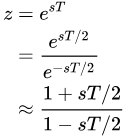

其中$T$是用在推导双线性变换的梯形公式中数值积分每阶的大小，换句话说就是采样间距。上述的双线性估计可以透过$s$来解或是产生一个近似估计$s=(1/T)\ln(z)$。

逆映射则为
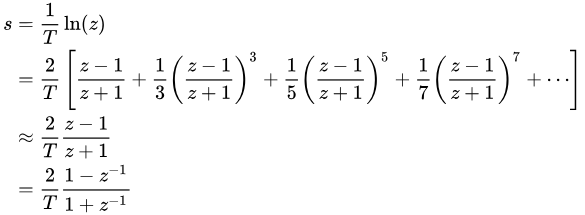
双线性变换的本质是使用这种一阶估计法且将连续时间传递函数$H_{a}(s)$中的$s$替换成
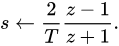
也就是说
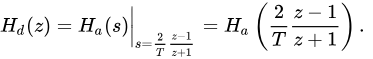



- MPC 离散化  
http://intheworld.win/2018/11/24/lqr%E4%B8%8E%E6%B1%BD%E8%BD%A6%E6%A8%AA%E5%90%91%E5%8A%A8%E5%8A%9B%E5%AD%A6/  
https://dsp.stackexchange.com/questions/45042/bilinear-transformation-of-continuous-time-state-space-system  
https://wenku.baidu.com/view/4491c009763231126edb1165.html?_wkts_=1697616762868&needWelcomeRecommand=1  
https://blog.csdn.net/wanrenqi/article/details/111600069  
https://blog.csdn.net/u013914471/article/details/83824490  
https://www.guyuehome.com/36741  

## 等式约束
$\begin{cases} \begin{align}
    \mathbf{x}(0) & = \mathbf{x}_{init} \\  
    \mathbf{x}(k+1)_{\left[n_x\ \times\ 1\right]} & = {A_d}_{\left[n_x\ \times\ n_x\right]} \cdot \mathbf{x}(k)_{\left[n_x\ \times\ 1\right]} + {B_d}_{\left[n_x\ \times\ n_u\right]} \cdot\mathbf{u}(k)_{\left[n_u\ \times\ 1\right]}, k = 0, 1, 2, \dots, n_{steps} -1
\end{align} \end{cases}$

$\implies \begin{cases} \begin{align}
    \mathbf{x}(0) & = \mathbf{x}_{init} \\
    \mathbf{x}(1) & = A_d \cdot \mathbf{x}(0) + B_d \cdot \mathbf{u}(0) \\
    \mathbf{x}(2) & = A_d \cdot \mathbf{x}(1) + B_d \cdot \mathbf{u}(1) \\
    & \cdots \\
    \mathbf{x}(n_{steps} - 1) & = A_d \cdot \mathbf{x}(n_{steps} - 2) + B_d \cdot \mathbf{u}(n_{steps} - 2) \\
    \mathbf{x}(n_{steps}) & = A_d \cdot \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 1) \\
\end{align} \end{cases}$

$\implies \begin{cases} \begin{align} - \mathbf{x}(0) & = - \mathbf{x}_{init} \\
    A_d \cdot \mathbf{x}(0) - \mathbf{x}(1) + B_d \cdot \mathbf{u}(0) & = 0 \\
    A_d \cdot \mathbf{x}(1) - \mathbf{x}(2) + B_d \cdot \mathbf{u}(1) & = 0 \\
    & \cdots \\
    A_d \cdot \mathbf{x}(n_{steps} - 2) - \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 2) & = 0 \\
    A_d \cdot \mathbf{x}(n_{steps} - 1) - \mathbf{x}(n_{steps}) + B_d \cdot \mathbf{u}(n_{steps} - 1) & = 0 \\
\end{align} \end{cases}$

$\implies 
\begin{array}{ccccc}
\left[ \begin{array}{cccccc|cccc} -I & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
A_d & -I & 0 & \cdots & 0 & 0 & B_d & 0 & \cdots & 0 & 0 \\
0 & A_d & -I & \cdots & 0 & 0 & 0 & B_d & \cdots & 0 & 0 \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
0 & 0 & 0 & \cdots & -I & 0 & 0 & 0 & \cdots & B_d & 0 \\
0 & 0 & 0 & \cdots & A_d & -I & 0 & 0 & \cdots & 0 & B_d \\
\end{array} \right] & \cdot & \left[\begin{matrix}
\mathbf{x}(0) \\ \mathbf{x}(1) \\ \mathbf{x}(2) \\ \cdots \\ \mathbf{x}(n_{steps} - 1) \\ \mathbf{x}(n_{steps}) \\ --- \\ \mathbf{u}(0) \\ \mathbf{u}(1) \\ \cdots \\ \mathbf{u}(n_{steps}-2) \\ \mathbf{u}(n_{steps}-1)
\end{matrix}\right] & = & \left[\begin{matrix} - \mathbf{x}_{init} \\ 0 \\ 0 \\ \cdots \\ 0 \\ 0 \end{matrix}\right] \\
\left[\left(n_x \cdot (n_{steps} + 1)\right) \times \left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right)\right] & \cdot &
\left[\left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right) \times 1 \right] & = &
\left[\left(n_x \cdot (n_{steps} + 1)\right) \times 1 \right]
\end{array}$

## 关于$\dot{u}$ 的不等式约束
$\begin{array}{cccccl}
& \mathbf{\dot{u}}_{lb,\ stiff}(k) & \leq & \mathbf{\dot{u}}(k) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(k), k = 0, 1, \dots, n_{steps} - 1 \\
\hline
k = 0 \\
& \mathbf{\dot{u}}_{lb,\ stiff}(0) & \leq & \mathbf{\dot{u}}(0) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(0) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(0) & \leq & \frac{\mathbf{u}(0) - \mathbf{u}_{prev}}{dt_{prev}} & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(0) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(0) \cdot dt_{prev} + \mathbf{u}_{prev} & \leq & \mathbf{u}(0) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(0) \cdot dt_{prev} + \mathbf{u}_{prev} \\
\hline
k = 1 \\
& \mathbf{\dot{u}}_{lb,\ stiff}(1) & \leq & \mathbf{\dot{u}}(1) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(1) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(1) & \leq & \frac{\mathbf{u}(1) - \mathbf{u}(0)}{dt} & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(1) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(1) \cdot dt & \leq & \mathbf{u}(1) - \mathbf{u}(0) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(1) \cdot dt \\
\hline
\cdots \\
k = n_{steps} - 1 \\
& \mathbf{\dot{u}}_{lb,\ stiff}(n_{steps} - 1) & \leq & \mathbf{\dot{u}}(n_{steps} - 1) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(n_{steps} - 1) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(n_{steps} - 1) & \leq & \frac{\mathbf{u}(n_{steps}\ - 1) - \mathbf{u}(n_{steps}\ - 2)}{dt} & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(n_{steps} - 1) \\
\implies & \mathbf{\dot{u}}_{lb,\ stiff}(n_{steps} - 1) \cdot dt & \leq & \mathbf{u}(n_{steps}\ - 1) - \mathbf{u}(n_{steps}\ - 2) & \leq & \mathbf{\dot{u}}_{ub,\ stiff}(n_{steps} - 1) \cdot dt \\
\end{array}$

## 松弛
### 原始问题(无松弛)
$\begin{array}{r,c,c,c,c,l}
\mbox{min} & & & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} \\
\mbox{subject to} & & & A_{eq} \cdot \mathbf{x} & = & b_{eq} \\
 & lb_{ineq} & \leq & A_{ineq} \cdot \mathbf{x} & \leq & ub_{ineq} \\
 & lb_{ineq\_hard} & \leq & A_{ineq\_hard} \cdot \mathbf{x} & \leq & ub_{ineq\_hard} \\
\end{array}$

### 一阶松弛
$\begin{array}{c,r,c,l}
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} & + & q_{max}^T slack_{max} + q_{min}^T slack_{min} & \\
\mbox{subject to} & A_{eq} \cdot \mathbf{x} & = & b_{eq} \\
 & A_{ineq} \cdot \mathbf{x} & \leq & ub_{ineq} + slack_{max} \\
 & slack_{max} & \geq & 0 \\
 & A_{ineq} \cdot \mathbf{x} & \geq & lb_{ineq} - slack_{min} \\
 & slack_{min} & \geq & 0 \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \leq & ub_{ineq\_hard} \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \geq & lb_{ineq\_hard} \\
\hline
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} & + & q_{max}^T slack_{max} + q_{min}^T slack_{min} & \\
\mbox{subject to} & A_{eq} \cdot \mathbf{x} & = & b_{eq} \\
 & A_{ineq} \cdot \mathbf{x} - slack_{max} & \leq & ub_{ineq} \\
 & - slack_{max} & \leq & 0 \\
 & - A_{ineq} \cdot \mathbf{x} - slack_{min} & \leq & - lb_{ineq} \\
 & - slack_{min} & \leq & 0 \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \leq & ub_{ineq\_hard} \\
 & - A_{ineq\_hard} \cdot \mathbf{x} & \leq & - lb_{ineq\_hard} \\
\end{array}$

---

$\begin{array}{c,c}
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} + q_{max}^T slack_{max} + q_{min}^T slack_{min} \\
\mbox{subject to} &
\left[ \begin{matrix} b_{eq} \\ -\infty \\ -\infty \\ -\infty \\ -\infty \\ -\infty \\ -\infty \end{matrix} \right] \leq
\left[ \begin{matrix}
A_{eq} & 0 & 0 \\ A_{ineq} & -I & 0 \\ 0 & -I & 0 \\ - A_{ineq} & 0 & -I \\ 0 & 0 & -I \\ A_{ineq\_hard} & 0 & 0 \\ - A_{ineq\_hard} & 0 & 0 \\
\end{matrix} \right] \cdot 
\left[ \begin{matrix} \mathbf{x} \\ slack_{max} \\ slack_{min} \end{matrix} \right]
\leq \left[ \begin{matrix} b_{eq} \\ ub_{ineq} \\ 0 \\ - lb_{ineq} \\ 0 \\ ub_{ineq\_hard} \\ - lb_{ineq\_hard} \end{matrix} \right]
\end{array}$

### 二阶松弛
$\begin{array}{c,r,c,l}
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} & + & slack_{max}^T q_{max}^T slack_{max} + slack_{min}^T q_{min}^T slack_{min} \\
\mbox{subject to} & A_{eq} \cdot \mathbf{x} & = & b_{eq} \\
 & A_{ineq} \cdot \mathbf{x} & \leq & ub_{ineq} + slack_{max} \\
 & A_{ineq} \cdot \mathbf{x} & \geq & lb_{ineq} - slack_{min} \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \leq & ub_{ineq\_hard} \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \geq & lb_{ineq\_hard} \\
\hline
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} & + & slack_{max}^T q_{max}^T slack_{max} + slack_{min}^T q_{min}^T slack_{min} \\
\mbox{subject to} & A_{eq} \cdot \mathbf{x} & = & b_{eq} \\
 & A_{ineq} \cdot \mathbf{x} - slack_{max} & \leq & ub_{ineq} \\
 & - A_{ineq} \cdot \mathbf{x} - slack_{min} & \leq & - lb_{ineq} \\
 & A_{ineq\_hard} \cdot \mathbf{x} & \leq & ub_{ineq\_hard} \\
 & - A_{ineq\_hard} \cdot \mathbf{x} & \leq & - lb_{ineq\_hard} \\
\end{array}$

---

$\begin{array}{c,c}
\mbox{min} & \frac{1}{2} \mathbf{x}^T P \mathbf{x} + q^T \mathbf{x} + slack_{max}^T q_{max}^T slack_{max} + slack_{min}^T q_{min}^T slack_{min} \\
\mbox{subject to} &
\left[ \begin{matrix} b_{eq} \\ -\infty \\ -\infty \\ -\infty \\ -\infty \end{matrix} \right] \leq
\left[ \begin{matrix}
A_{eq} & 0 & 0 \\ A_{ineq} & -I & 0 \\ - A_{ineq} & 0 & -I \\ A_{ineq\_hard} & 0 & 0 \\ - A_{ineq\_hard} & 0 & 0 \\
\end{matrix} \right] \cdot 
\left[ \begin{matrix} \mathbf{x} \\ slack_{max} \\ slack_{min} \end{matrix} \right]
\leq \left[ \begin{matrix} b_{eq} \\ ub_{ineq} \\ - lb_{ineq} \\ ub_{ineq\_hard} \\ - lb_{ineq\_hard} \end{matrix} \right]
\end{array}$

# Lateral Vehicle Dynamics/横向车辆动力学 
**Translation and Derivation** of Chapter 2 - Lateral Vehicle Dynamics in "Rajamani, R. (2011). Vehicle dynamics and control. Springer Science & Business Media."

todo:
[自动驾驶控制算法 —— 车辆运动学模型](https://zhuanlan.zhihu.com/p/518388326)  
[自动驾驶控制算法 —— 车辆动力学模型](https://zhuanlan.zhihu.com/p/521422077)  
[自动驾驶控制算法 —— 横向LQR控制+前馈控制](https://zhuanlan.zhihu.com/p/521695558)

## 圆周运动
定义 | 公式 | 证明
:-: | :-: | :-:
角速度 | $$\omega = \frac{d\theta}{dt} = \frac{2\pi}{T} = 2\pi f$$
角加速度| $$a_{angular} = \frac{d\omega}{dt} = \frac{d^2 \theta}{dt^2}$$
切线速度 | $$v_{tangent} = R \cdot \omega = \frac{2\pi R}{T}$$ | $$v_{tangent} = \frac{dl}{dt} = \frac{R \cdot d\theta}{dt} = R \cdot \omega $$
切线加速度| $$a_{tangent} = R \cdot a_{angular}$$ | $$a_{tangent} = \frac{d v_{tangent}}{dt} = \frac{R \cdot d\omega}{dt} = R \cdot a_{angular} $$
法线加速度 | $$a_{normal} = v_{tangent} \cdot \omega = R \cdot \omega^2 = \frac{v_{tangent}^2}{R} = \frac{4\pi^2}{T^2}R$$ | https://zhuanlan.zhihu.com/p/342775656
弧度 | $$\theta$$
弧长 | $$l = R \cdot \theta$$
周期 | $$T$$
频率 | $$f = \frac{1}{T}$$
半径 | $$R$$

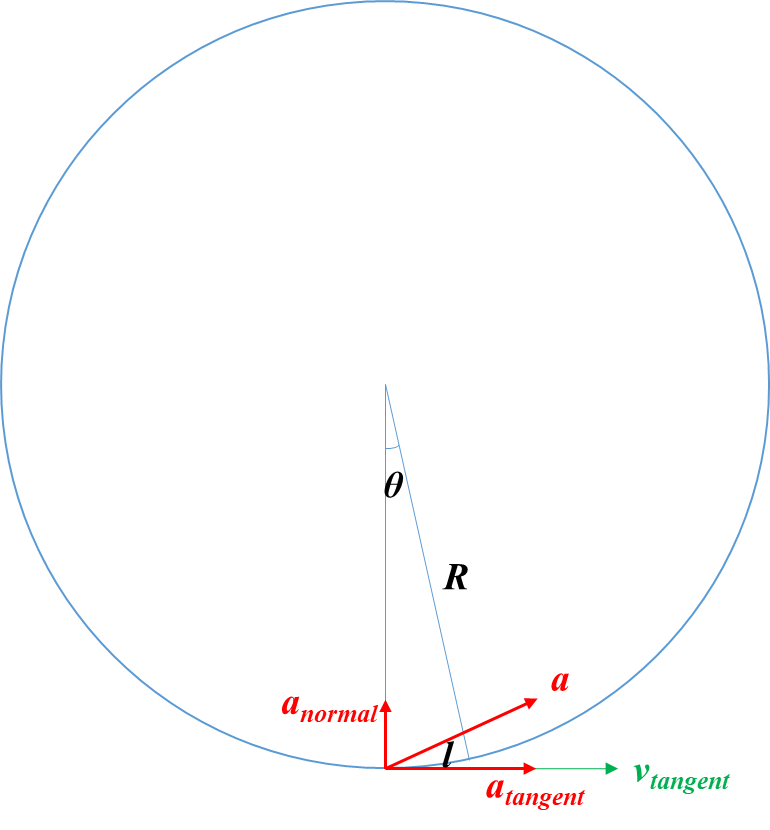

## Kinematic Model of Lateral Vehicle Motion/横向车辆运动的运动学模型
&emsp;&emsp;在下述某些假设下，可以开发车辆横向运动的运动学模型。这种模型提供了车辆运动的数学描述，而不考虑影响运动的力。 运动方程纯粹基于控制系统的几何关系。  

&emsp;&emsp;考虑如图2-3所示的自行车模型(Wang and Qi, 2001)。在自行车模型中，左右两个前轮由A点处的一个单轮表示。同样，后轮由B点处的一个中央后轮表示。前后轮的转向角度分别由$\delta_f$和$\delta_r$表示。
该模型是在假设前轮和后轮都可以转向的情况下推导出来的。 对于仅前轮转向的情况，后转向角可以设为零。车辆重心(center of gravity, c.g.)位于 C 点。A点和B点到车辆重心的距离分别为$\mathscr{l}_f$和$\mathscr{l}_r$。车辆的轴距为$L= \mathscr{l}_f + \mathscr{l}_r$。

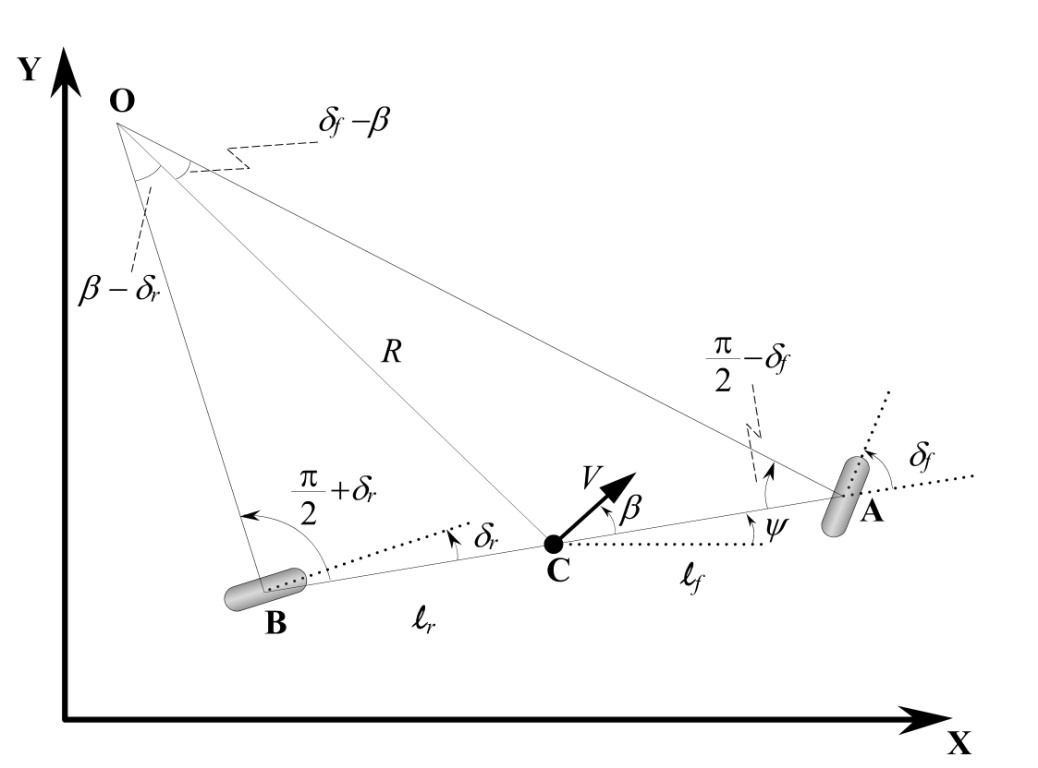
图2-3 横向车辆运动的运动学

&emsp;&emsp;假设车辆进行平面运动。需要三个坐标来描述车辆的运动：$X$、$Y$和$\psi$。$(X, Y)$是车辆重心位置的惯性坐标；$\psi$描述车辆的方向(orientation)。**车辆重心处的速度**由$V$表示，并且**与车辆的纵轴**成一定角度$\beta$。该角度$\beta$称为**车辆的滑移角**(slip angle)。(The velocity at the c.g. of the vehicle is denoted by $V$ and makes an angle &\beta& with the longitudinal axis of the vehicle. The angle $\beta$ is called the slip angle of the vehicle.)

&emsp;&emsp;<u>假设</u>  
&emsp;&emsp;运动学模型开发中使用的主要**假设是A点和B点的速度向量分别沿前轮和后轮方向**(orientation)。换句话说，前轮处的速度向量与车辆的纵轴成一定角度$\delta_f$。 同样，后轮的速度向量与车辆的纵轴形成一个角度$\delta_r$。这**当于假设两个车轮的“slip angles”均为零**。对于车辆的<font color="red">**低速运动**(例如，**速度小于 5 m/s**)</font>，这是合理的假设。当低速行驶时，轮胎产生的**侧向力**(lateral force)较小。为了在任意半径为$R$的圆形道路上行驶，轮胎的总侧向力为$\frac{mV^2}{R}$，它随速度$V$呈二次方变化，并且在低速时较小。当侧向力很小时，如后面2.4节中所解释的，假设每个车轮的速度向量沿车轮的方向是非常合理的。

&emsp;&emsp;O点是车辆的瞬时滚动中心。点O由线段AO和BO的交点定义，**这两条线垂直于两个滚动轮的方向**。

&emsp;&emsp;车辆路径的半径$R$由线段OC的长度定义，线段OC将重心C与瞬时滚动中心O连接起来。重心处的速度垂直于线段OC。重心处速度的方向与车辆纵轴的夹角称为车辆的slip angle$\beta$。

&emsp;&emsp;角$\psi$称为车辆的航向角(heading angle)。车辆的course angle为$\gamma = \psi + \beta$。

&emsp;&emsp;将正弦定理应用于三角形 OCA。
$$\begin{align}
& \frac{\sin(\delta_f-\beta)}{\mathscr{l}_f} = \frac{\sin\left( \frac{\pi}{2} - \delta_f\right)}{R} & \cdots (2.1)\\
\implies & \frac{\sin\delta_f\cos\beta - \sin\beta\cos\delta_f}{\mathscr{l}_f} = \frac{\cos\delta_f}{R} & \cdots (2.3)
\end{align}$$

&emsp;&emsp;将正弦定理应用于三角形 OCB。
$$\begin{align}
& \frac{\sin(\beta - \delta_r)}{\mathscr{l}_r} = \frac{\sin\left( \frac{\pi}{2} + \delta_r\right)}{R} & \cdots (2.2)\\
\implies & \frac{\cos\delta_f\sin\beta - \cos\beta\sin\delta_r}{\mathscr{l}_f} = \frac{\cos\delta_r}{R} & \cdots (2.4)
\end{align}$$

&emsp;&emsp;将公式(2.3)两边相乘$\frac{\mathscr{l}_f}{\cos\delta_f}$，得到 $$\tan\delta_f\cos\beta - \sin\beta = \frac{\mathscr{l}_f}{R}\cdots(2.5)$$

&emsp;&emsp;将公式(2.4)两边相乘$\frac{\mathscr{l}_f}{\cos\delta_r}$，得到 $$\sin\beta - \tan\delta_r\cos\beta = \frac{\mathscr{l}_r}{R}\cdots(2.6)$$

&emsp;&emsp;公式(2.5)和(2.6)相加得到 $$\left( \tan\delta_f - \tan\delta_r \right) \cos\beta = \frac{\mathscr{l}_f + \mathscr{l}_r}{R}\cdots(2.7)$$

&emsp;&emsp;如果我们假设车辆路径的半径在低车速时缓慢变化，那么**车辆方向(orientation)的变化率(即$\dot{\psi}$)必须等于车辆的角速度**，如下图所示。由于车辆的角速度为$V/R$，因此有$$\dot{\psi} = \frac{V}{R}\cdots(2.8)$$
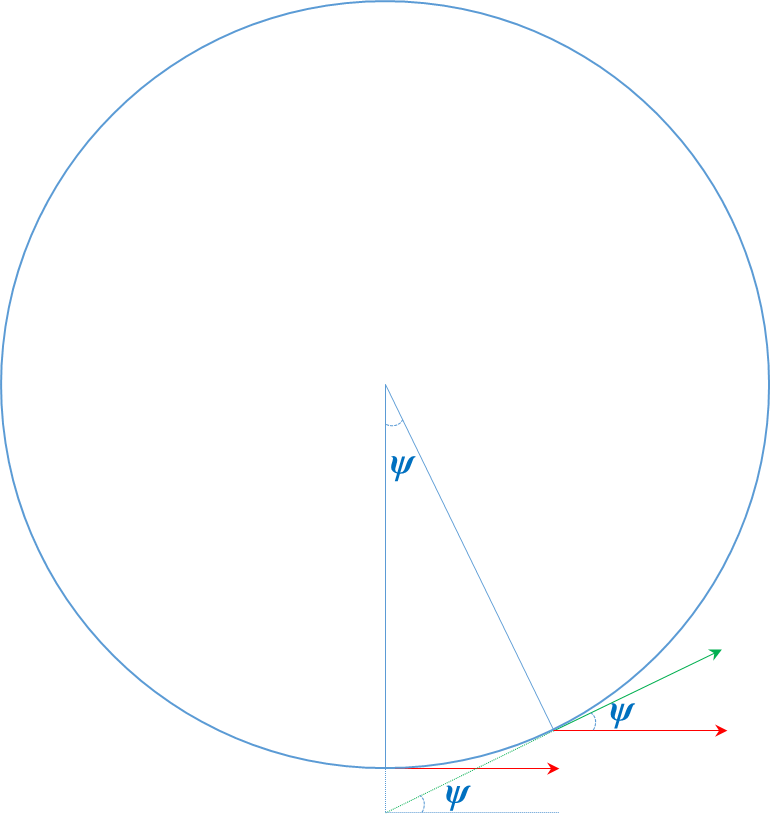

&emsp;&emsp;将公式(2.8)代入(2.7)得到
 $$\dot{\psi} = \frac{V\cos\beta}{\mathscr{l}_f + \mathscr{l}_r}\left( \tan\delta_f - \tan\delta_r \right) \cdots(2.9)$$

&emsp;&emsp;因此，**全部运动方程**由下式给出

$$\begin{array}{r,c,l,l}
\dot{X} & = & V\cos(\psi + \beta) & \cdots(2.10) \\
\dot{Y} & = & V\sin(\psi + \beta) & \cdots(2.11) \\
\dot{\psi} & = & \frac{V\cos\beta}{\mathscr{l}_f + \mathscr{l}_r}\left( \tan\delta_f - \tan\delta_r \right) & \cdots(2.12)\end{array}$$

&emsp;&emsp;在此模型中有三个输入：$\delta_f$、$\delta_r$和$V$。速度$V$是外部变量，可以假设为随时间变化的函数，或者从纵向车辆模型获得。

联立公式(2.5)$*\mathscr{l}_r$和公式(2.6)$*\mathscr{l}_f$，可得到slip angle$\beta$：$$\beta = \tan^{-1}\left( \frac{\mathscr{l}_f\tan\delta_r + \mathscr{l}_r \tan\delta_f}{\mathscr{l}_f + \mathscr{l}_r} \right) \cdots(2.13)$$
> Proof of Eq. (2.13):
$$\begin{array}{c,r,c,l}
& \mathscr{l}_r\left(\tan\delta_f\cos\beta - \sin\beta\right) & = & \frac{\mathscr{l}_f \mathscr{l}_r}{R} = \mathscr{l}_f\left(\sin\beta - \tan\delta_r\cos\beta \right)\\
\implies & \mathscr{l}_r\left(\tan\delta_f - \tan\beta\right) & = & \mathscr{l}_f\left(\tan\beta - \tan\delta_r\right) \\ 
\implies & \mathscr{l}_f\tan\beta + \mathscr{l}_r\tan\beta & = & \mathscr{l}_f\tan\delta_r + \mathscr{l}_r\tan\delta_f \\
\implies & \left(\mathscr{l}_f + \mathscr{l}_r\right)\tan\beta & = & \mathscr{l}_f\tan\delta_r + \mathscr{l}_r\tan\delta_f \\
\implies & \tan\beta & = & \frac{\mathscr{l}_f\tan\delta_r + \mathscr{l}_r\tan\delta_f}{\mathscr{l}_f + \mathscr{l}_r} \\
\end{array}$$

- **Summary**
符号 | 定义 | 公式
:-: | :- | :-
$$X$$ | Global $X$ axis coordinate | $$\color{Red}{\dot{X} = V\cos(\psi + \beta)}$$
$$Y$$ | Global $Y$ axis coordinate | $$\color{Red}{\dot{Y} = V\sin(\psi + \beta)}$$
$$\psi$$ | Yaw angle; orientation angle of vehicle with respect to global $X$ axis | $$\color{Red}{\dot{\psi} = \frac{V\cos\beta}{\mathscr{l}_f + \mathscr{l}_r}\left( \tan\delta_f - \tan\delta_r \right)}$$
$$\beta$$ | Vehicle slip angle | $$\color{Red}{\beta = \tan^{-1}\left( \frac{\mathscr{l}_f\tan\delta_r + \mathscr{l}_r \tan\delta_f}{\mathscr{l}_f + \mathscr{l}_r} \right)}$$

## Bicycle Model of Lateral Vehicle Dynamics/动力学模型
&emsp;&emsp;**在较高的车辆速度下，假设每个车轮的速度沿车轮方向不再成立**。 在这种情况下，必须开发横向车辆运动的动力学模型，而不是运动学模型。

&emsp;&emsp;具有两个自由度的车辆的“自行车”模型，如图2-6所示。这两个自由度由车辆横向位置$y$和车辆偏航角(yaw angle)$\psi$表示。
点O是车辆的旋转中心。车辆偏航角$\psi$相对于全局$X$轴测量得到。
车辆在重心处的纵向速度表示为$V_x$。

&emsp;&emsp;稍后将考虑道路侧倾角(bank angle)的影响。现在忽略道路侧倾角，并对$y$轴运动使用牛顿第二定律(Guldner, et. al., 1996)
$$ma_y = F_{yf} + F_{yr}\cdots(2.19)$$
其中，$a_y$是车辆在$y$轴方向上重心处的惯性加速度，$F_{yf}$和$F_{yr}$分别是前轮和后轮的横向轮胎力(lateral tire forces)。
$a_y$包含两项：1)沿$y$轴运动产生的加速度$\ddot{y}$；2)向心加速度$V_x\dot{\psi}$，其中$V_x$是圆周运动的切线速度，$\dot{\psi}$等于圆周旋转的角速度。 因此，
$$a_y = \ddot{y} + V_x\dot{\psi} \cdots (2.20)$$

&emsp;&emsp;将公式(2.20)代入公式(2.19)，可得车辆的横向平移运动方程：
$$m(\ddot{y} + \dot{\psi}V_x) = F_{yf} + F_{yr} \cdots (2.21)$$ 

&emsp;&emsp;绕$z$轴的力矩平衡(moment balance)产生偏航动力学方程：
$$I_z\ddot{\psi} = \mathscr{l}_f F_{yf} - \mathscr{l}_r F_{yr} \cdots (2.22)$$
其中，$\mathscr{l}_f$和$\mathscr{l}_r$分别是前轮胎和后轮胎距车辆重心的距离。

&emsp;&emsp;下一步建模作用在车辆上的lateral tire forces $F_{yf}$和$F_{yr}$。实验结果表明，对于小slip-angles，轮胎的lateral tire forces正比于“slip-angle”。**轮胎的slip angle定义为轮胎方向与车轮速度向量方向之间的夹角**(The slip angle of a tire is defined as the angle between the orientation of the tire and the orientation of the velocity vector of the wheel)。下图中，前轮slip angle为
$$ a_f = \delta - \theta_{V_f} \cdots (2.23)$$
其中，$\theta_{V_f}$是速度向量与车辆纵轴所成的角度，$\delta$是前轮转向角(steering angle)。类似地，后轮slip angle如下：
$$ a_r = - \theta_{V_r} \cdots (2.24)$$

&emsp;&emsp;关于为什么lateral tire force正比于slip angle的物理解释可以在第13章(第13.4节)中找到。

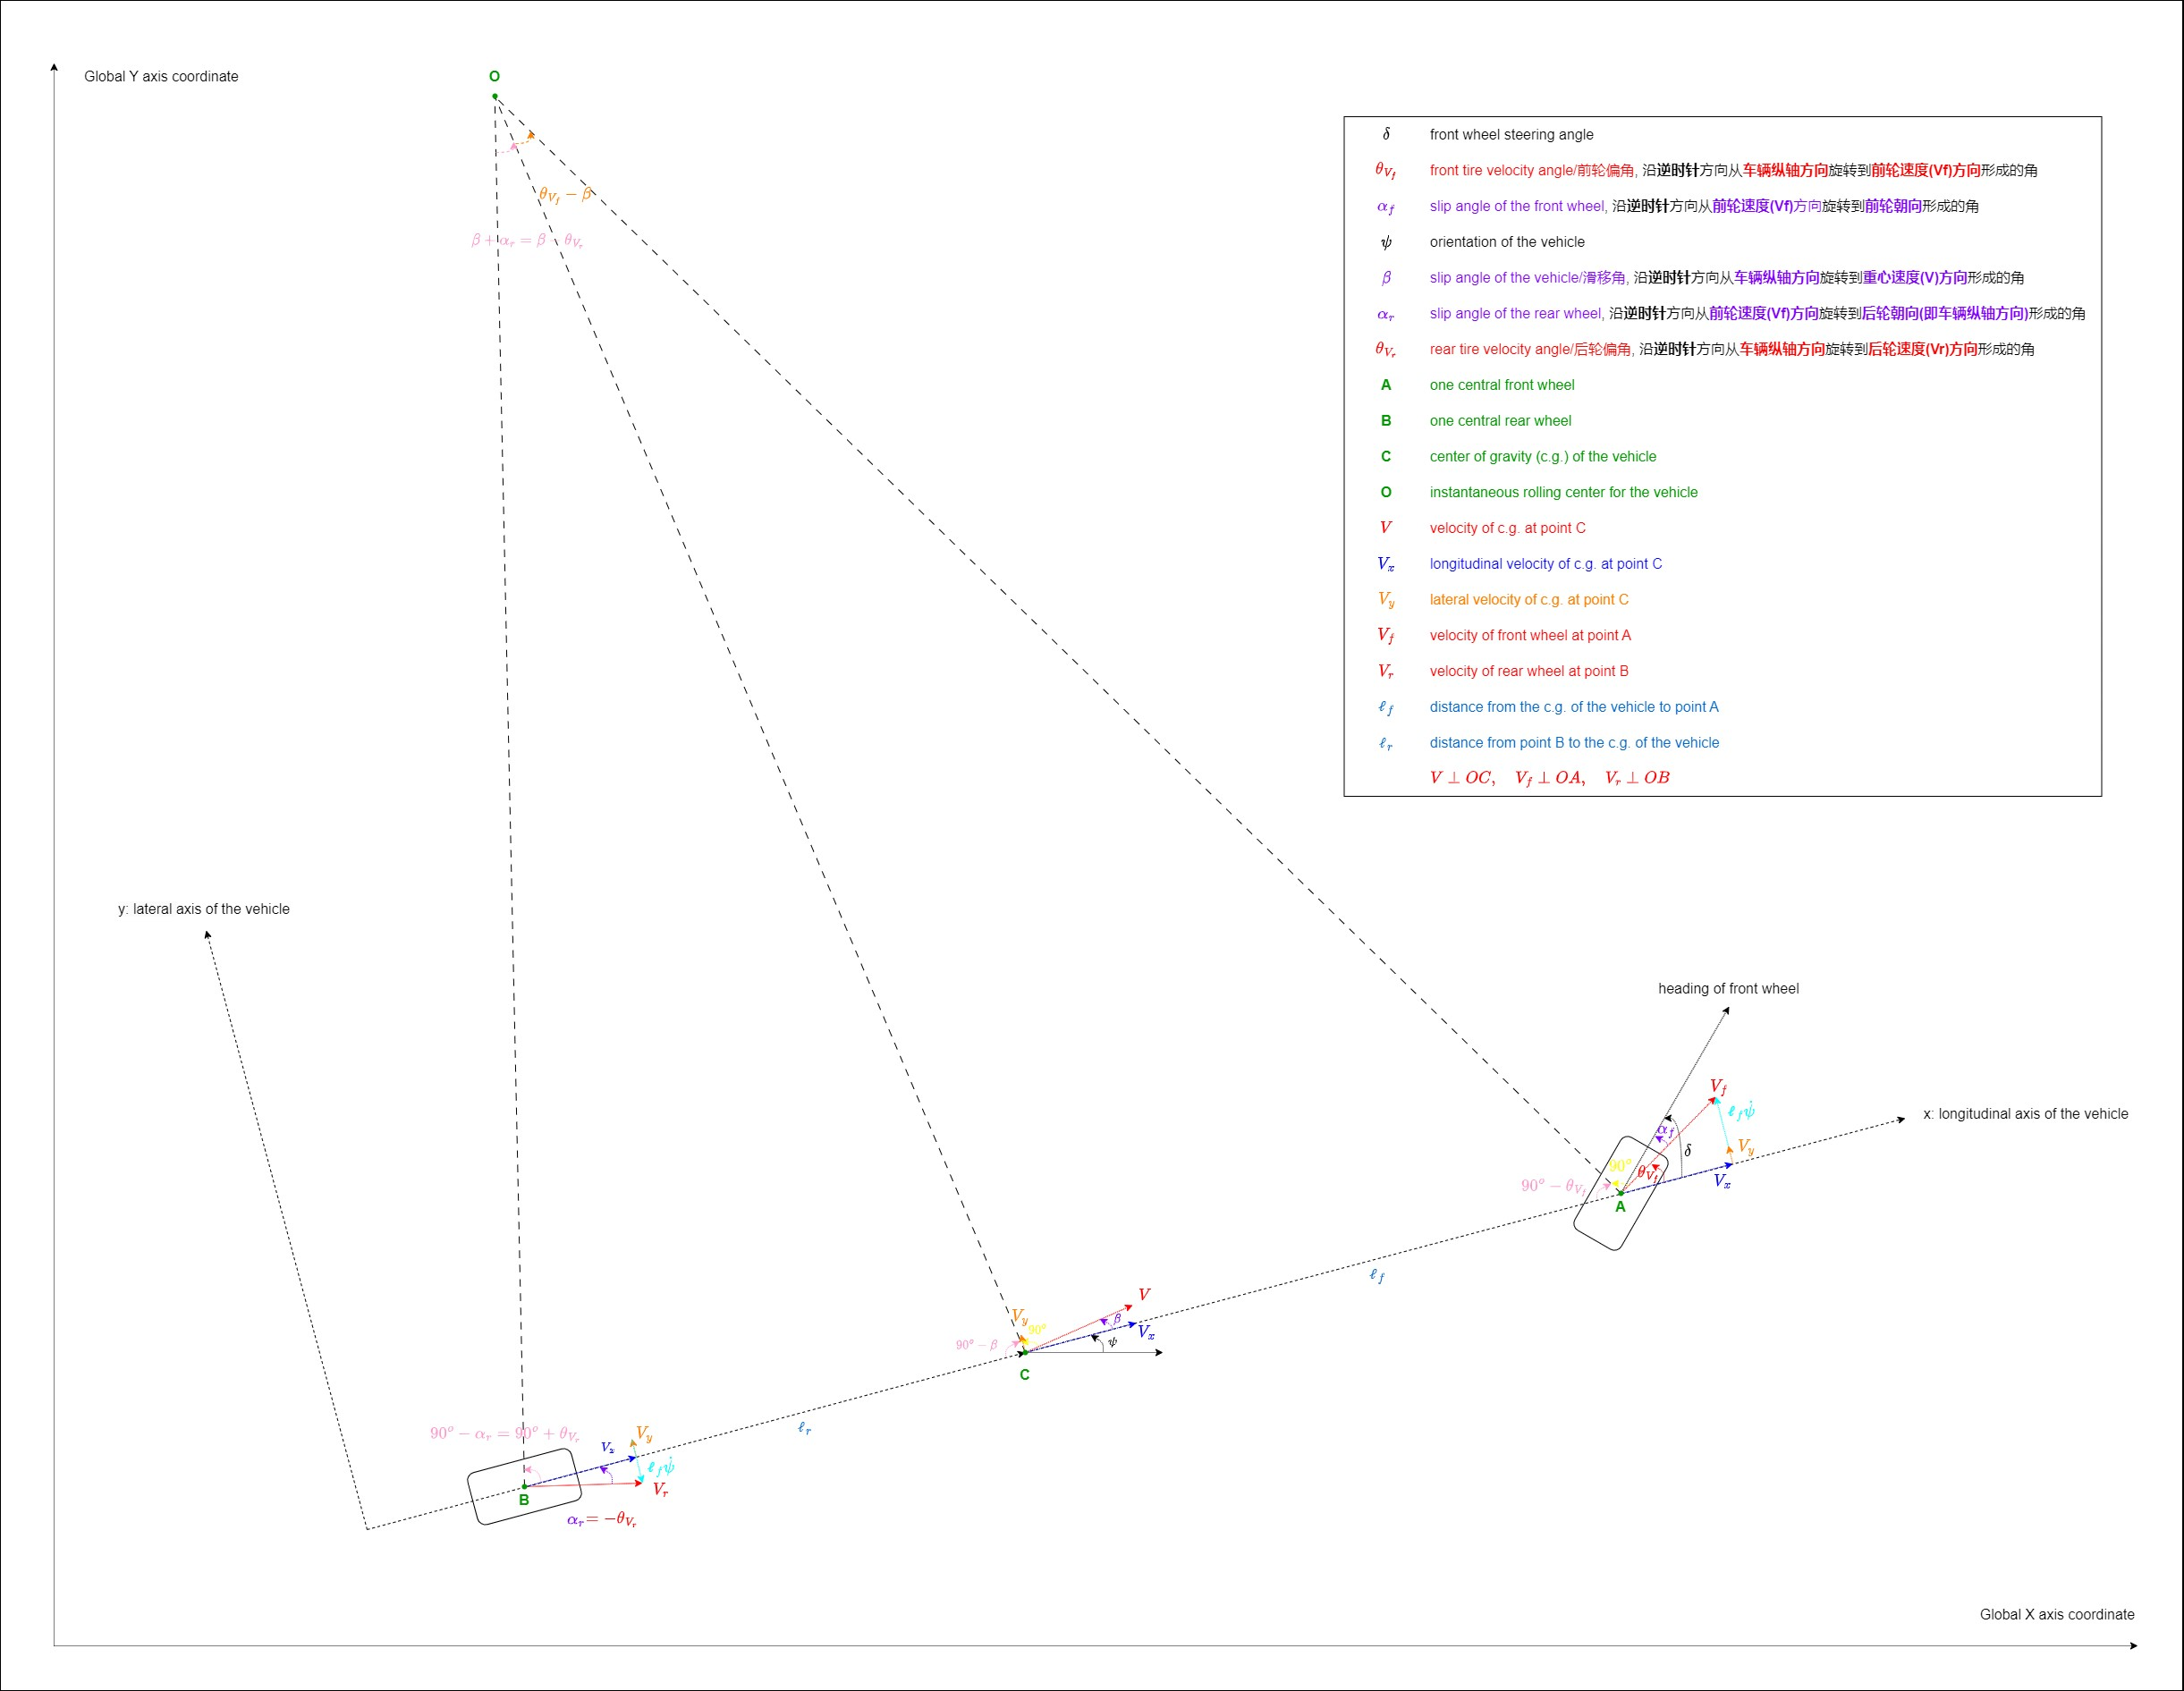
图X 动力学模型  
**注意**：车辆围绕$O$点，重心在半径$OC=R$的圆上旋转，前轮和后轮未必半径$R的圆上，即$OA$和$OB$的长度未必等于$R$。

&emsp;&emsp;因此，车辆前轮的lateral tire force可以写为
$$ F_{yf} = 2C_{af}(\delta - \theta_{V_f}) \cdots (2.25)$$
其中，比例常数$C_{af}$被称为每个前轮的侧偏刚度(cornering stiffness)，$\delta$为前轮转向角，$\theta_{V_f}$为前轮速度角。系数2表明有两个前轮。

&emsp;&emsp;类似地，后轮的lateral tire force可以写为
$$ F_{yr} = 2C_{ar}( - \theta_{V_r}) \cdots (2.26)$$
其中，$C_{ar}$是每个后轮胎的侧偏刚度，$\theta_{V_r}$是后轮速度角。

&emsp;&emsp;以下关系式可用于计算$\theta_{V_f}$和$\theta_{V_r}$：
$$\begin{align}
\tan\theta_{V_f} & = \frac{V_y + \mathscr{l}_f \dot{\psi}}{V_x} & \cdots(2.27)\\
\tan\theta_{V_r} & = \frac{V_y - \mathscr{l}_r \dot{\psi}}{V_x} & \cdots(2.28)\\
\end{align}$$

> Proof of Eq. (2.27):
$$\begin{align}
& \frac{\sin\angle AOC}{AC} = \frac{\sin\angle OAC}{OC}\\
\implies & \frac{\sin\left(\theta_{V_f}-\beta\right)}{\mathscr{l}_f} = \frac{\sin\left(90^o-\theta_{V_f}\right)}{OC} = \frac{\cos\theta_{V_f}}{OC}\\
& \because \dot{\psi} = \frac{V}{R}, \therefore OC = R = \frac{V}{\dot{\psi}} \\
\implies & \frac{\sin\left(\theta_{V_f}-\beta\right)}{\mathscr{l}_f} = \frac{\cos\theta_{V_f}\dot{\psi}}{V}\\
\implies & \frac{\sin\theta_{V_f}\cos\beta - \cos\theta_{V_f}\sin\beta}{\mathscr{l}_f} = \frac{\cos\theta_{V_f}\dot{\psi}}{V}\\
\implies & \frac{\sin\theta_{V_f}\cos\beta - \cos\theta_{V_f}\sin\beta}{\cos\theta_{V_f}\cos\beta} = \frac{\mathscr{l}_f\dot{\psi}}{V\cos\beta}\\
\implies & \tan\theta_{V_f} - \tan\beta = \frac{\mathscr{l}_f\dot{\psi}}{V_x}\\
& \because \tan{\beta} = \frac{V_y}{V_x}\\
\implies & \tan\theta_{V_f} = \tan\beta + \frac{\mathscr{l}_f\dot{\psi}}{V_x} = \frac{V_y}{V_x} + \frac{\mathscr{l}_f\dot{\psi}}{V_x} = \frac{V_y + \mathscr{l}_f\dot{\psi}}{V_x}\\
\end{align}$$

>Proof of Eq. (2.28):
$$\begin{align}
& \frac{\sin\angle BOC}{BC} = \frac{\sin\angle OBC}{OC}\\
\implies & \frac{\sin\left(\beta-\theta_{V_r}\right)}{\mathscr{l}_r} = \frac{\sin\left(90^o+\theta_{V_r}\right)}{OC} = \frac{\cos\theta_{V_r}}{OC}\\
& \because \dot{\psi} = \frac{V}{R}, \therefore OC = R = \frac{V}{\dot{\psi}} \\
\implies & \frac{\sin\left(\beta-\theta_{V_r}\right)}{\mathscr{l}_r} = \frac{\cos\theta_{V_r}\dot{\psi}}{V}\\
\implies & \frac{\sin\beta\cos\theta_{V_r} - \cos\beta\sin\theta_{V_r}}{\mathscr{l}_r} = \frac{\cos\theta_{V_r}\dot{\psi}}{V}\\
\implies & \frac{\sin\beta\cos\theta_{V_r} - \cos\beta\sin\theta_{V_r}}{\cos\theta_{V_r}\cos\beta} = \frac{\mathscr{l}_r\dot{\psi}}{V\cos\beta}\\
\implies & \tan\beta - \tan\theta_{V_r} = \frac{\mathscr{l}_r\dot{\psi}}{V\cos\beta}\\
& \because \tan{\beta} = \frac{V_y}{V_x}\\
\implies & \tan\theta_{V_r} = \tan\beta - \frac{\mathscr{l}_r\dot{\psi}}{V\cos\beta} = \frac{V_y}{V_x} - \frac{\mathscr{l}_r\dot{\psi}}{V_x} = \frac{V_y - \mathscr{l}_r\dot{\psi}}{V_x}\\
\end{align}$$
[Tire Slip and Modeling(轮胎滑移和建模)](https://blog.csdn.net/qq_44305475/article/details/118790532)中关于后轮滑移角的证明不严谨，其近似假设$l_r \approx R\theta$的前提为$OB = OC$，在大多数情况下不成立。

&emsp;&emsp;使用小角度近似$\tan\theta \approx \theta$，并使用符号$V_y = \dot{y}$，
$$\begin{align}
\theta_{V_f} & = \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x} & \cdots(2.29)\\
\theta_{V_r} & = \frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x} & \cdots(2.30)\\
\end{align}$$

&emsp;&emsp;将公式(2.25)、(2.26)、(2.29)和(2.30)代入公式(2.21)和(2.22)，状态空间模型可写为
$$\frac{d}{dt}\left[ \begin{matrix} y \\ \dot{y} \\ \psi \\ \dot{\psi}\end{matrix} \right] = 
\left[ \begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & 0 & -V_x - \frac{2\mathscr{l}_f C_{af} - 2\mathscr{l}_r C_{ar}}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & - \frac{2\mathscr{l}_f C_{af} - 2\mathscr{l}_r C_{ar}}{I_z V_x} & 0 & - \frac{2\mathscr{l}_f^2 C_{af} + 2\mathscr{l}_r^2 C_{ar}}{I_z V_x} \end{matrix} \right] \cdot
\left[ \begin{matrix} y \\ \dot{y} \\ \psi \\ \dot{\psi}\end{matrix} \right] + \left[ \begin{matrix} 0 \\ \frac{2C_{af}}{m} \\ 0 \\ \frac{2\mathscr{l}_f C_{af}}{I_z} \end{matrix} \right] \cdot \delta \cdots (2.31)
$$

> Proof of Eq. (2.31)<span id='proof_2_31'></span>:
$$\begin{array}{r,c,l,c}
m(\ddot{y} + \dot{\psi}V_x) & = & F_{yf} + F_{yr} & \cdots (2.21) \\
I_z\ddot{\psi} & = & \mathscr{l}_f F_{yf} - \mathscr{l}_r F_{yr} & \cdots (2.22) \\
F_{yf} & = & 2C_{af}(\delta - \theta_{V_f}) & \cdots (2.25) \\
F_{yr} & = & 2C_{ar}( - \theta_{V_r}) & \cdots (2.26) \\
\theta_{V_f} & = & \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x} & \cdots(2.29)\\
\theta_{V_r} & = & \frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x} & \cdots(2.30)\\
\end{array} \\
\implies \begin{cases} \begin{array}{r,c,l,l}
m(\ddot{y} + \dot{\psi}V_x) & = & 2C_{af}(\delta - \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x}) + 2C_{ar}( - \frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x}) & \cdots(A) \\
I_z\ddot{\psi} & = & 2 \mathscr{l}_f C_{af}(\delta - \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x}) - 2 \mathscr{l}_r C_{ar}( - \frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x}) & \cdots(B) \\
\end{array} \end{cases}$$
$$\begin{array}{r,r,c,l,l}
(A) \implies & m\ddot{y} + mV_x\dot{\psi} & = & 2C_{af}(\delta - \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x}) + 2C_{ar}( - \frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x}) \\
\implies & m\ddot{y} & = & - \frac{2C_{af}\dot{y} + 2 \mathscr{l}_f C_{af} \dot{\psi}}{V_x} - \frac{2C_{ar}\dot{y} - 2 \mathscr{l}_r C_{ar} \dot{\psi}}{V_x} - mV_x\dot{\psi} + 2C_{af}\delta \\
& & = & - \frac{2C_{af}\dot{y}}{V_x} - \frac{2 \mathscr{l}_f C_{af} \dot{\psi}}{V_x} - \frac{2C_{ar}\dot{y}}{V_x} + \frac{ 2 \mathscr{l}_r C_{ar} \dot{\psi}}{V_x} - mV_x\dot{\psi} + 2C_{af}\delta \\
& & = & - \frac{2C_{af}\dot{y}}{V_x} - \frac{2C_{ar}\dot{y}}{V_x} - mV_x\dot{\psi} - \frac{2 \mathscr{l}_f C_{af} \dot{\psi}}{V_x} + \frac{ 2 \mathscr{l}_r C_{ar} \dot{\psi}}{V_x} + 2C_{af}\delta \\
& & = & - \frac{2C_{af} + 2C_{ar}}{V_x}\dot{y} - mV_x\dot{\psi} - \frac{2 \mathscr{l}_f C_{af} - 2 \mathscr{l}_r C_{ar}}{V_x}\dot{\psi} + 2C_{af}\delta \\
\implies & \ddot{y} & = & - \frac{2C_{af} + 2C_{ar}}{mV_x}\dot{y} + \left(- V_x - \frac{2 \mathscr{l}_f C_{af} - 2 \mathscr{l}_r C_{ar}}{mV_x} \right)\dot{\psi} + \frac{2C_{af}}{m}\delta & \cdots (C)\\
(B) \implies & I_z\ddot{\psi} & = & - 2 \mathscr{l}_f C_{af} \frac{\dot{y} + \mathscr{l}_f \dot{\psi}}{V_x} +
2 \mathscr{l}_r C_{ar}\frac{\dot{y} - \mathscr{l}_r \dot{\psi}}{V_x} +
2 \mathscr{l}_f C_{af}\delta \\
& & = & - \frac{2 \mathscr{l}_f C_{af}}{V_x}\dot{y} - \frac{2 \mathscr{l}_f^2 C_{af}}{V_x}\dot{\psi} +
\frac{2 \mathscr{l}_r C_{ar}}{V_x}\dot{y} - \frac{2 \mathscr{l}_r^2 C_{ar}}{V_x}\dot{\psi} +
2 \mathscr{l}_f C_{af}\delta \\
& & = & - \frac{2 \mathscr{l}_f C_{af} - 2 \mathscr{l}_r C_{ar}}{V_x}\dot{y} - \frac{2 \mathscr{l}_f^2 C_{af} + 2 \mathscr{l}_r^2 C_{ar}}{V_x}\dot{\psi} + 2 \mathscr{l}_f C_{af}\delta \\
\implies & \ddot{\psi} & = & - \frac{2 \mathscr{l}_f C_{af} - 2 \mathscr{l}_r C_{ar}}{I_z V_x}\dot{y} - \frac{2 \mathscr{l}_f^2 C_{af} + 2 \mathscr{l}_r^2 C_{ar}}{I_z V_x}\dot{\psi} + \frac{2 \mathscr{l}_f C_{af}}{I_z}\delta & \cdots (D)
\end{array}$$

## Dynamic Model in Terms of Error with Respect to Road
&emsp;&emsp;当目标是开发用于自动车道保持的转向控制系统时，利用动力学模型是有用的，其中状态变量以相对于道路的位置和方向误差的形式。

&emsp;&emsp;因此，第[3.2](#Bicycle-Model-of-Lateral-Vehicle-Dynamics/动力学模型)节中开发的横向模型将以下列误差变量的形式重新定义：
- $e_y$：车辆重心距车道中心线的距离；
- $e_{\psi}$：车辆相对于道路的方向误差。

&emsp;&emsp;假设车辆以恒定纵向速度$V_x$在恒定半径$R$的道路上行驶。再假设半径$R$很大，以便与上一节中的小角度假设相同。将车辆所需方向的变化率定义为<span id='eq_2_38'></span>
$$\dot{\psi}_{des} = \frac{V_x}{R} \cdots (2.38)$$

&emsp;&emsp;车辆的期望加速度可以写为
$$\frac{V_x^2}{R} = V_x \dot{\psi}_{des} \cdots (2.39)$$
公式(2.38)和(2.39)的推导可参见[圆周运动](#圆周运动)。**注意**：此处的$R$是车道的圆弧半径，前两节中出现的$R$是车辆重心的旋转半径。

&emsp;&emsp;定义$\ddot{e}_y$和$e_{\psi}$如下(Guldner, et. al., 1996)：
$$\begin{align}
\ddot{e}_y & = a_y - \frac{V_x^2}{R} = \left( \ddot{y} + V_x \dot{\psi} \right) - \frac{V_x^2}{R} = \ddot{y} + V_x \left( \dot{\psi} - \dot{\psi}_{des} \right) & \cdots (2.40) \\
e_{\psi} & = \psi - \psi_{des} & \cdots (2.41)
\end{align}$$
其中，$a_y$定义于公式(2.20)，即$a_y = \ddot{y} + V_x\dot{\psi} \cdots (2.20)$

&emsp;&emsp;定义
$$\dot{e}_y = \dot{y} + V_x \left( \psi - \psi_{des} \right) \cdots (2.42)$$
<font color="red">如果速度$V_x$恒定</font>，则公式(2.42)与公式(2.40)一致, <font color="red">对公式(2.40)积分即得到公式(2.42)</font>。如果速度不是恒定的，则对公式(2.40)积分并得到
$$\dot{e}_y = \dot{y} + \int V_x \dot{e}_{\psi} dt$$
这将产生一个非线性且时变的模型，并且对控制系统设计没有帮助。 因此，采取的方法是假设纵向速度恒定并获得一个LTI模型。**如果速度发生变化，那么LTI模型将替换为LPV模型，后者的纵向速度是随时间变化的参数**(参见下一章的3.4节)。

<!-- &emsp;&emsp;将公式(2.41)和(2.42)代入(2.21)和(2.22)，得到：  
(2.43)  
(2.44)   -->

&emsp;&emsp;最终，跟踪误差变量的状态空间模型由下式给出  
$$\frac{d}{dt}\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] = 
\left[ \begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \cdot
\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] +
\left[ \begin{matrix} 0 \\ \frac{2C_{af}}{m} \\ 0 \\ \frac{2 C_{af} \mathscr{l}_f}{I_z} \end{matrix} \right] \cdot \delta +
\left[ \begin{matrix} 0 \\ - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \\ 0 \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \cdot \dot{\psi}_{des}\cdots (2.45)
$$ 

&emsp;&emsp;转向控制问题的跟踪目标可以表示为公式(2.45)给出的动力学稳定问题。**请注意，上面展示的横向动力学模型是一个假设纵向车速$V_x$恒定的函数**。

> Proof of Eq. (2.45)<span id='proof_2_45'></span>:  
**前提**：$V_x$ **is assumed to be constant**.
$$\begin{cases} \begin{array}{r,r,c,l,l}
& \ddot{e}_y & = & \ddot{y} + V_x \left( \dot{\psi} - \dot{\psi}_{des} \right) & \cdots (2.40) \\
\implies & \dot{e}_y & = & \dot{y} + V_x \left( \psi - \psi_{des} \right) & \cdots (2.42) \\
& e_{\psi} & = & \psi - \psi_{des} & \cdots (2.41) \\
\implies & \dot{e}_{\psi} & = & \dot{\psi} - \dot{\psi}_{des} \\
& & \because & \dot{\psi}_{des} = \frac{V_x}{R} = Constant, \therefore \ddot{\psi}_{des} = 0 & \cdots (2.38) \\
\implies & \ddot{e}_{\psi} & = & \ddot{\psi} - \ddot{\psi}_{des} = \ddot{\psi} \\
\end{array} \end{cases} \\
\implies \begin{cases} \begin{array}{r,c,l}
\ddot{y} & = & \ddot{e}_y - V_x \left( \dot{\psi} - \dot{\psi}_{des} \right) = \ddot{e}_y - V_x \dot{e}_{\psi} \\
\dot{y} & = & \dot{e}_y - V_x \left( \psi - \psi_{des} \right) = \dot{e}_y - V_x e_{\psi}\\
\psi & = & e_{\psi} + \psi_{des} \\
\dot{\psi} & = & \dot{e}_{\psi} + \dot{\psi}_{des} \\
\ddot{\psi} & = & \ddot{e}_{\psi} \\
\end{array} \end{cases} \cdots (E)$$
&emsp;&emsp;将方程组(E)代入公式(2.31)证明过程中的公式([C](#proof_2_31))，得到<span id='eq_F'></span>：
$$\begin{array}{r,c,l,l}
\ddot{y} & = & - \frac{2C_{af} + 2C_{ar}}{mV_x}\dot{y} + \left(- V_x - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \right)\dot{\psi} + \frac{2C_{af}}{m}\delta & \cdots (C)\\
\ddot{e}_y - V_x \dot{e}_{\psi} & = & -
\frac{2C_{af} + 2C_{ar}}{mV_x} \left( \dot{e}_y - V_x e_{\psi} \right) +
\left(- V_x - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \right) \left( \dot{e}_{\psi} + \dot{\psi}_{des} \right) +
\frac{2C_{af}}{m}\delta \\
\ddot{e}_y & = & -
\frac{2C_{af} + 2C_{ar}}{mV_x} \dot{e}_y + \frac{2C_{af} + 2C_{ar}}{mV_x} V_x e_{\psi} -
V_x \dot{e}_{\psi} - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \dot{e}_{\psi} +
\left(- V_x - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \right) \dot{\psi}_{des} +
\frac{2C_{af}}{m}\delta + V_x \dot{e}_{\psi} \\
& = & -
\frac{2C_{af} + 2C_{ar}}{mV_x} \dot{e}_y + \frac{2C_{af} + 2C_{ar}}{mV_x} V_x e_{\psi} -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left(- \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} \\
& = & -
\frac{2C_{af} + 2C_{ar}}{mV_x} \dot{e}_y + \frac{2C_{af} + 2C_{ar}}{m} e_{\psi} +
\frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left(- \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} & \cdots (F) \\
\end{array}$$
公式(2.45)第二行证毕。  
&emsp;&emsp;将方程组(E)代入公式(2.31)证明过程中的公式([D](#proof_2_31))，得到<span id='eq_G'></span>：
$$\begin{array}{r,c,l,l}
\ddot{\psi} & = & - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x}\dot{y} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x}\dot{\psi} + \frac{2 C_{af} \mathscr{l}_f}{I_z}\delta & \cdots (D) \\
\ddot{e}_{\psi} & = & -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \left( \dot{e}_y - V_x e_{\psi} \right) -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \left( \dot{e}_{\psi} + \dot{\psi}_{des} \right) +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta \\
& = & -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \dot{e}_y +
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} V_x e_{\psi} -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta \\
& = & -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \dot{e}_y +
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} e_{\psi} -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} & \cdots (G) \\
\end{array}$$
公式(2.45)第四行证毕。   

- **Summary**
符号 | 定义 | 方程
:-: | :- | :-
$$x$$ | State space vector | $$x = \left[e_y, \dot{e}_y, e_{\psi}, \dot{e}_{\psi} \right]^T $$
$\cdots$ | $\cdots$ | $$\dot{x} = Ax + B \delta + C \dot{\psi}_{des} $$
$\cdots$ | $\cdots$ | Matrices $A$, $B$ and $C$ are defined in equation (2.45)
$$e_y$$ | Lateral position error with respect to road | $$\ddot{e}_y = \ddot{y} + V_x \left( \dot{\psi} - \dot{\psi}_{des} \right)$$
$$e_{\psi}$$ | Yaw angle error with respect to road | $$e_{\psi} = \psi - \psi_{des}$$
$$\delta$$ | Front wheel steering angle | 
$$\dot{\psi}_{des}$$ | Desired yaw rate determined from road radius $R$ | $$\dot{\psi}_{des} = \frac{V_x}{R}$$

# 横向MPC
## 仿射系统变换
Convert $\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} + C$(仿射系统, $C$ is a constant vector) to $\dot{\chi} = A\mathbf{\chi} + B\mathbf{u}$

### 连续时域的仿射系统变换
refer to: https://math.stackexchange.com/questions/3433137/what-is-the-difference-between-dotx-ax-b-bu-and-dotx-ax-bu-w  
let $\chi = \mathbf{x} + A_c^{-1}C_c \implies \dot{\chi} = \dot{\mathbf{x}}$, then
$$\begin{align}
& \dot{\mathbf{x}} = A_c\mathbf{x} + B_c\mathbf{u} + C_c \\
\implies & \dot{\chi} = A_c\left( \chi - A_c^{-1}C_c \right) + B_c\mathbf{u} + C_c \\
\implies & \dot{\chi} = A_c\chi - A_cA_c^{-1}C_c + B_c\mathbf{u} + C_c = A_c\chi - C_c + B_c\mathbf{u} + C_c = A_c\chi + B_c\mathbf{u} \\
\implies & \dot{\chi} = A_c\chi + B_c\mathbf{u} \\
\end{align}$$


### 离散时域的仿射系统变换
let $\chi(k) = \mathbf{x}(k) + (A-I)^{-1}C \implies \chi(k + 1) = \mathbf{x}(k + 1) + (A-I)^{-1}C$, then
$$\begin{align}
& \mathbf{x}(k + 1) = A_d\mathbf{x}(k) + B_d\mathbf{u}(k) + C_d \\
\implies & \chi(k + 1) - (A_d-I)^{-1}C_d = A_d\left( \chi(k) - (A_d-I)^{-1}C_d \right) + B_d\mathbf{u}(k) + C_d \\
\implies & \chi(k + 1) = A_d\chi(k) - A_d(A_d-I)^{-1}C_d + B_d\mathbf{u}(k) + C_d + (A_d-I)^{-1}C_d \\
\implies & \chi(k + 1) = A_d\chi(k) - (A_d-I)(A_d-I)^{-1}C_d + B_d\mathbf{u}(k) + C_d = A_d\chi(k) - C_d + B_d\mathbf{u}(k) + C_d \\
\implies & \chi(k + 1) = A_d\chi(k) + B_d\mathbf{u}(k) \\
\end{align}$$

## 横向车辆误差模型

1. 连续模型: $$ \dot{\mathbf{x}} = A_c \cdot \mathbf{x} + B_c \cdot \mathbf{u} + C_c $$

$$\begin{array}{c,c,c,c,c,c,c,c,c,c,c}
\frac{d}{dt}\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] & = &
\left[ \begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] & \cdot &
\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] & + &
\left[ \begin{matrix} 0 \\ \frac{2C_{af}}{m} \\ 0 \\ \frac{2 C_{af} \mathscr{l}_f}{I_z} \end{matrix} \right] & \cdot & \delta & + &
\left[ \begin{matrix} 0 \\ - \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \\ 0 \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \cdot \dot{\psi}_{des} \\
% -----------------------------------------------
\frac{d}{dt}\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] & = &
\left[ \begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] & \cdot &
\left[ \begin{matrix} e_y \\ \dot{e}_y \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] & + &
\left[ \begin{matrix} 0 \\ \frac{2C_{af}}{m} \\ 0 \\ \frac{2 C_{af} \mathscr{l}_f}{I_z} \end{matrix} \right] & \cdot & \delta & + &
\left[ \begin{matrix} 0 \\ \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \\ 0 \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \cdot \dot{\psi}_{des} \\
% -----------------------------------------------
\dot{\mathbf{x}} & = & A_c & \cdot & \mathbf{x} & + & B_c & \cdot & \mathbf{u} & + & C_c \\
\end{array}$$ 

2. 离散化:
$$\begin{align}
\mathbf{x}(k+1) & = A_d \cdot \mathbf{x}(k) + B_d \cdot \mathbf{u}(k) + C_d \\
A_d & = \left( I - \frac{dt}{2} A_c \right)^{-1}\left( I + \frac{dt}{2}A_c \right) = \left( \frac{2}{dt}I - A_c \right)^{-1}\left( \frac{2}{dt}I + A_c \right)\\
B_d & = \left( I - \frac{dt}{2} A_c \right)^{-1} \cdot B_c \cdot dt  = \left( \frac{2}{dt}I - A_c \right)^{-1} \cdot 2B_c \\
C_d & = \left( I - \frac{dt}{2} A_c \right)^{-1} \cdot C_c \cdot dt  = \left( \frac{2}{dt}I - A_c \right)^{-1} \cdot 2C_c \\
\end{align}$$

$$\begin{array}{c,c,c,c,c,c,c,c,c,c,c}
\left[ \begin{matrix} e_y(k+1) \\ \dot{e}_y(k+1) \\ e_{\psi}(k+1) \\ \dot{e}_{\psi}(k+1) \end{matrix} \right] & = &
\left( \frac{2}{dt}I - A_c \right)^{-1}\left( \frac{2}{dt}I + A_c \right) & \cdot &
\left[ \begin{matrix} e_y(k) \\ \dot{e}_y(k) \\ e_{\psi}(k) \\ \dot{e}_{\psi}(k) \end{matrix} \right] & + &
\left( \frac{2}{dt}I - A_c \right)^{-1} \cdot 2B_c & \cdot & \delta & + &
\left( \frac{2}{dt}I - A_c \right)^{-1} \cdot 2C_c \\
% -----------------------------------------------
\mathbf{x}(k+1) & = & A_d & \cdot & \mathbf{x}(k) & + & B_d & \cdot & \mathbf{u}(k) & + & C_d \\
\end{array}$$ 

3. 离散后放射变换: let $\chi(k) = \mathbf{x}(k) + (A_d-I)^{-1}C_d $,
$$\implies \chi(k+1) = A_d \cdot \chi(k) + B_d \cdot \mathbf{u}(k) $$

$$\begin{array}{c,c,c,c,c,c,c,c,c,c}
& \left[ \begin{matrix} E_y(k) \\ \dot{E}_y(k) \\ E_{\psi}(k) \\ \dot{E}_{\psi}(k) \end{matrix} \right] & = & & &
\left[ \begin{matrix} e_y(k) \\ \dot{e}_y(k) \\ e_{\psi}(k) \\ \dot{e}_{\psi}(k) \end{matrix} \right] & + &
(A_d-I)^{-1}C_d \\
% -----------------------------------------------
& \chi(k) & = & & & \mathbf{x}(k) & + & (A_d-I)^{-1}C_d \\
% -----------------------------------------------
\implies & \left[ \begin{matrix} E_y(k+1) \\ \dot{E}_y(k+1) \\ E_{\psi}(k+1) \\ \dot{E}_{\psi}(k+1) \end{matrix} \right] & = &
\left( \frac{2}{dt}I - A_c \right)^{-1}\left( \frac{2}{dt}I + A_c \right) & \cdot &
\left[ \begin{matrix} E_y(k) \\ \dot{E}_y(k) \\ E_{\psi}(k) \\ \dot{E}_{\psi}(k) \end{matrix} \right] & + &
\left( \frac{2}{dt}I - A_c \right)^{-1} \cdot 2B_c & \cdot & \delta \\
% -----------------------------------------------
& \chi(k+1) & = & A_d & \cdot & \chi(k) & + & B_d & \cdot & \mathbf{u}(k) \\
\end{array}$$

Notice: 下表$_c$是continuous的简写, 下表$_d$是discrete的简写

## 等式约束
$\begin{cases} \begin{align}
    \mathbf{x}(0) & = \mathbf{x}_{init} \\  
    \mathbf{x}(k+1)_{\left[n_x\ \times\ 1\right]} & = {A_d}_{\left[n_x\ \times\ n_x\right]} \cdot \mathbf{x}(k)_{\left[n_x\ \times\ 1\right]} + {B_d}_{\left[n_x\ \times\ n_u\right]} \cdot\mathbf{u}(k)_{\left[n_u\ \times\ 1\right]}, k = 0, 1, 2, \dots, n_{steps} -1
\end{align} \end{cases}$

$\implies \begin{cases} \begin{align}
    \mathbf{x}(0) & = \mathbf{x}_{init} \\
    \mathbf{x}(1) & = A_d \cdot \mathbf{x}(0) + B_d \cdot \mathbf{u}(0) \\
    \mathbf{x}(2) & = A_d \cdot \mathbf{x}(1) + B_d \cdot \mathbf{u}(1) \\
    & \cdots \\
    \mathbf{x}(n_{steps} - 1) & = A_d \cdot \mathbf{x}(n_{steps} - 2) + B_d \cdot \mathbf{u}(n_{steps} - 2) \\
    \mathbf{x}(n_{steps}) & = A_d \cdot \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 1) \\
\end{align} \end{cases}$

$\implies \begin{cases} \begin{align} - \mathbf{x}(0) & = - \mathbf{x}_{init} \\
    A_d \cdot \mathbf{x}(0) - \mathbf{x}(1) + B_d \cdot \mathbf{u}(0) & = 0 \\
    A_d \cdot \mathbf{x}(1) - \mathbf{x}(2) + B_d \cdot \mathbf{u}(1) & = 0 \\
    & \cdots \\
    A_d \cdot \mathbf{x}(n_{steps} - 2) - \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 2) & = 0 \\
    A_d \cdot \mathbf{x}(n_{steps} - 1) - \mathbf{x}(n_{steps}) + B_d \cdot \mathbf{u}(n_{steps} - 1) & = 0 \\
\end{align} \end{cases}$

$\implies 
\begin{array}{ccccc}
\left[ \begin{array}{cccccc|cccc} -I & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
A_d & -I & 0 & \cdots & 0 & 0 & B_d & 0 & \cdots & 0 & 0 \\
0 & A_d & -I & \cdots & 0 & 0 & 0 & B_d & \cdots & 0 & 0 \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
0 & 0 & 0 & \cdots & -I & 0 & 0 & 0 & \cdots & B_d & 0 \\
0 & 0 & 0 & \cdots & A_d & -I & 0 & 0 & \cdots & 0 & B_d \\
\end{array} \right] & \cdot & \left[\begin{matrix}
\mathbf{x}(0) \\ \mathbf{x}(1) \\ \mathbf{x}(2) \\ \cdots \\ \mathbf{x}(n_{steps} - 1) \\ \mathbf{x}(n_{steps}) \\ --- \\ \mathbf{u}(0) \\ \mathbf{u}(1) \\ \cdots \\ \mathbf{u}(n_{steps}-2) \\ \mathbf{u}(n_{steps}-1)
\end{matrix}\right] & = & \left[\begin{matrix} - \mathbf{x}_{init} \\ 0 \\ 0 \\ \cdots \\ 0 \\ 0 \end{matrix}\right] \\
\left[\left(n_x \cdot (n_{steps} + 1)\right) \times \left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right)\right] & \cdot &
\left[\left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right) \times 1 \right] & = &
\left[\left(n_x \cdot (n_{steps} + 1)\right) \times 1 \right]
\end{array}$

### 降维
let $ \dot{\gamma} = \ddot{e}_y - V_x \dot{e}_{\psi} \implies \gamma = \dot{e}_y - V_x e_{\psi} $  
>根据公式([F](#eq_F))得到:
$$\begin{array}{r,c,l}
& \ddot{e}_y & = - \frac{2C_{af} + 2C_{ar}}{mV_x} \dot{e}_y + \frac{2C_{af} + 2C_{ar}}{m} e_{\psi} +
\frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left(- \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} \cdot (F) \\
\implies & \ddot{e}_y  - V_x \dot{e}_{\psi} & = -
\frac{2C_{af} + 2C_{ar}}{mV_x} \dot{e}_y + \frac{2C_{af} + 2C_{ar}}{mV_x} V_x e_{\psi} +
\frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \dot{e}_{\psi} - V_x \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left( \frac{- 2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} \\
\implies & \ddot{e}_y  - V_x \dot{e}_{\psi} & = - 
\frac{2C_{af} + 2C_{ar}}{mV_x} \left( \dot{e}_y - V_x e_{\psi} \right) +
\left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left( \frac{ - 2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} \\
\implies & \dot{\gamma} & = - 
\frac{2C_{af} + 2C_{ar}}{mV_x} \gamma +
\left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{e}_{\psi} +
\frac{2C_{af}}{m}\delta + \left( \frac{ - 2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \dot{\psi}_{des} \cdots (H)\\
\end{array}$$
根据公式([G](#eq_G))得到:
$$\begin{align}
\ddot{e}_{\psi} & = -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \dot{e}_y +
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} e_{\psi} -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} \cdot (G) \\
& = -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \dot{e}_y +
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} V_x e_{\psi} -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} \\
& = -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \left( \dot{e}_y - V_x e_{\psi} \right) -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} \\
& = -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} \gamma -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{e}_{\psi} +
\frac{2 C_{af} \mathscr{l}_f}{I_z}\delta -
\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \dot{\psi}_{des} \cdots (I) \\
\end{align}$$

将公式([2.38](#eq_2_38)) $\dot{\psi}_{des} = \frac{V_x}{R} = V_x \cdot \kappa$ 代入到公式(H)和(I)得到
$$\begin{array}{c,c,c,c,c,c,c,c,c,c,c}
\frac{d}{dt}\left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] & = &
\left[ \begin{matrix} -
\frac{2C_{af} + 2C_{ar}}{mV_x} & \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \\ -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] & \cdot &
\left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] & + &
\left[ \begin{matrix} \frac{2C_{af}}{m} \\ \frac{2 C_{af} \mathscr{l}_f}{I_z} \end{matrix} \right] & \cdot & \delta & + &
\left[ \begin{matrix} \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \cdot V_x \cdot \kappa \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \cdot V_x \cdot \kappa \end{matrix} \right] \\
% -----------------------------------------------
\frac{d}{dt}\left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] & = &
\left[ \begin{matrix} -
\frac{2C_{af} + 2C_{ar}}{mV_x} & \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \\ -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] & \cdot &
\left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] & + &
\left[ \begin{matrix} \frac{2C_{af}}{m} \\ \frac{2 C_{af} \mathscr{l}_f}{I_z} \end{matrix} \right] & \cdot & \delta & + &
\left[ \begin{matrix} \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{m} - V_x^2 \right) \cdot \kappa \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z} \kappa \end{matrix} \right] \\
% -----------------------------------------------
\left[ \begin{matrix} \dot{\gamma} \\ \ddot{e}_{\psi} \end{matrix} \right] & = & A_{c_1} & \cdot & \left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] & + & B_{c_1} & \cdot & \mathbf{u} & + & C_{c_1} \\
\end{array}$$ 

### 消常数项
let $\left[ \begin{matrix} \Gamma \\ \dot{e}_{\psi} \end{matrix} \right] = \left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] + A_{c_1}^{-1}C_{c_1} \implies \left[ \begin{matrix} \dot{\Gamma} \\ \ddot{e}_{\psi} \end{matrix} \right] = \left[ \begin{matrix} \dot{\gamma} \\ \ddot{e}_{\psi} \end{matrix} \right]$, then
$$ \left[ \begin{matrix} \dot{\Gamma} \\ \ddot{e}_{\psi} \end{matrix} \right] = A_{c_1} \left[ \begin{matrix} \Gamma \\ \dot{e}_{\psi} \end{matrix} \right] + B_{c_1}\mathbf{u} $$
>$\begin{align}
\left[ A_{c_1} | I \right] = &
\left[ \begin{array}{cc|cc} -
\frac{2C_{af} + 2C_{ar}}{mV_x} & \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) & 1 & 0 \\ -
\frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} & 0 & 1 \end{array} \right] \\
\stackrel{r_1 \times -\frac{mV_x}{2C_{af} + 2C_{ar}} \\ r_2 \times - \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} }{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & - \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} - V_x \right) \frac{mV_x}{2C_{af} + 2C_{ar}} & -\frac{mV_x}{2C_{af} + 2C_{ar}} & 0 \\ 
1 & \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} & 0 & - \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \end{array} \right] \\
\stackrel{Simplify}{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{2C_{af} + 2C_{ar}} & -\frac{mV_x}{2C_{af} + 2C_{ar}} & 0 \\ 
1 & \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } & 0 & - \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \end{array} \right] \\
% let \ \mathscr{A} = & \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{2C_{af} + 2C_{ar}} \\
% \mathscr{B} = & \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } \\
\stackrel{let \ \mathscr{A} = \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{2C_{af} + 2C_{ar}} \\ \mathscr{B} = \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } \\ r_2 - r_1}{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & \mathscr{A} & -\frac{mV_x}{2C_{af} + 2C_{ar}} & 0 \\ 
0 & \mathscr{B} - \mathscr{A} & \frac{mV_x}{2C_{af} + 2C_{ar}} & - \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \end{array} \right] \\
\stackrel{\frac{r_2}{\mathscr{B} - \mathscr{A}}}{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & \mathscr{A} & -\frac{mV_x}{2C_{af} + 2C_{ar}} & 0 \\ 
0 & 1 & \frac{mV_x}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & - \frac{I_z V_x}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\end{array} \right] \\
\stackrel{r_1 - \mathscr{A} r_2 }{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & 0 & -\frac{mV_x}{2C_{af} + 2C_{ar}} - \frac{mV_x \mathscr{A}}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & \frac{I_z V_x \mathscr{A}}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
0 & 1 & \frac{mV_x}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & - \frac{I_z V_x}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\end{array} \right] \\
\stackrel{Simplify}{\longrightarrow} & 
\left[ \begin{array}{cc|cc} 
1 & 0 & - \frac{mV_x \mathscr{B}}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & \frac{I_z V_x \mathscr{A}}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
0 & 1 & \frac{mV_x}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & - \frac{I_z V_x}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\end{array} \right] \\
A_{c_1}^{-1} = & \left[ \begin{matrix}
- \frac{mV_x \mathscr{B}}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & \frac{I_z V_x \mathscr{A}}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\frac{mV_x}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & - \frac{I_z V_x}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\end{matrix} \right] \\
A_{c_1}^{-1}C_{c_1} = & \left[ \begin{matrix}
- \frac{mV_x \mathscr{B}}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & \frac{I_z V_x \mathscr{A}}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\frac{mV_x}{\left( 2C_{af} + 2C_{ar} \right)\left( \mathscr{B} - \mathscr{A} \right)} & - \frac{I_z V_x}{\left( 2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r \right)\left( \mathscr{B} - \mathscr{A} \right)} \\
\end{matrix} \right] \cdot
\left[ \begin{matrix} \left( \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{m} - V_x^2 \right) \cdot \kappa \\ -\frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z} \kappa \end{matrix} \right]
\end{align}$

$\left[ \begin{matrix} \Gamma \\ \dot{e}_{\psi} \end{matrix} \right] = \left[ \begin{matrix} \gamma \\ \dot{e}_{\psi} \end{matrix} \right] + A_{c_1}^{-1}C_{c_1} = \left[ \begin{matrix} 0 & 1 & -V_x & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]
\left[ \begin{matrix} e_{y} \\ \dot{e}_{y} \\ e_{\psi} \\ \dot{e}_{\psi} \end{matrix} \right] + A_{c_1}^{-1}C_{c_1}$

### $A_d$推导

$\begin{align}
\left( \frac{2}{dt}I - A_c \right)^{-1} & =
% ----------------------------------
\left\{
\left[\begin{matrix}
\frac{2}{dt} & 0 & 0 & 0 \\
0 & \frac{2}{dt} & 0 & 0 \\
0 & 0 & \frac{2}{dt} & 0 \\
0 & 0 & 0 & \frac{2}{dt} \end{matrix}\right] - 
\left[\begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix}\right]
\right\}^{-1} \\ & =
% ----------------------------------
\left[\begin{matrix}
\frac{2}{dt} & -1 & 0 & 0 \\
0 & \frac{2}{dt} + \frac{2C_{af} + 2C_{ar}}{mV_x} & -\frac{2C_{af} + 2C_{ar}}{m} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & \frac{2}{dt} & -1 \\
0 & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{I_z} & \frac{2}{dt} + \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right]^{-1}
\end{align}$

$\begin{align}
\left[ \frac{2}{dt}I - A_c | I \right] = & \left[\begin{array}{cccc|cccc}
\frac{2}{dt} & -1 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & \frac{2}{dt} + \frac{2C_{af} + 2C_{ar}}{mV_x} & -\frac{2C_{af} + 2C_{ar}}{m} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{mV_x} & 0 & 1 & 0 & 0 \\
0 & 0 & \frac{2}{dt} & -1 & 0 & 0 & 1 & 0 \\
0 & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{I_z} & \frac{2}{dt} + \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} & 0 & 0 & 0 & 1 
\end{array}\right] \\
% ------------------------------------------------------
\stackrel{r_1 \times \frac{dt}{2} \\ r_2 \times mV_x \\ r_3 \times \frac{dt}{2} \\ r_4 \times \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} }{\longrightarrow} &
\left[\begin{array}{cccc|cccc}
1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 & 0 & 0 \\
0 & \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} & -\left(2C_{af} + 2C_{ar}\right)V_x & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r & 0 & mV_x & 0 & 0 \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
0 & 1 & -V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
\end{array}\right] \\
% ------------------------------------------------------
\stackrel{r_2 \leftrightarrow r_4 }{\longrightarrow} &
\left[\begin{array}{cccc|cccc}
1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 & 0 & 0 \\
0 & 1 & -V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
0 & \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} & -\left(2C_{af} + 2C_{ar}\right)V_x & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r & 0 & mV_x & 0 & 0 \\
\end{array}\right] \\
\end{align}$

$\begin{align}
\stackrel{r_1 + r_2 \times \frac{dt}{2} \\ r_4 - r_2 \times \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right)}{\longrightarrow} &
\left[\begin{array}{c|cccc|cccc}
r_1 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 & 0 & 0 \\
r_2 \times \frac{dt}{2} & 0 & \frac{dt}{2} & -V_x \frac{dt}{2} & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
{r_1}_{new} & 1 & 0 & -V_x \frac{dt}{2} & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} & \frac{dt}{2} & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
\hline
r_2 & 0 & 1 & -V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
\hline
r_3 & 0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
\hline
r_4 & 0 & \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} & -\left(2C_{af} + 2C_{ar}\right)V_x & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r & 0 & mV_x & 0 & 0 \\
r_2 \times \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) & 0 & \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} & -\left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) \\
{r_4}_{new} & 0 & 0 & \frac{2mV_x^2}{dt} & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) & 0 & mV_x & 0 & -\frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) \\
\end{array}\right] \\
\stackrel{r_1 + r_2 \times \frac{dt}{2} \\ r_4 - r_2 \times \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right)}{\longrightarrow} &
\left[\begin{array}{cccc|cccc}
1 & 0 & -V_x \frac{dt}{2} & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} & \frac{dt}{2} & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
0 & 1 & -V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
% -----------------------------
0 & 0 & \frac{2mV_x^2}{dt} & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) & 0 & mV_x & 0 & -\frac{I_z V_x}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
\end{array}\right] \\
\end{align}$

$\begin{align}
\stackrel{r_1 + r_3 \times V_x \frac{dt}{2} \\ r_2 + r_3 \times V_x \\ r_4 - r_3 \times \frac{2mV_x^2}{dt}}{\longrightarrow} & 
\left[\begin{array}{c|cccc|cccc}
r_1 & 1 & 0 & -V_x \frac{dt}{2} & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} & \frac{dt}{2} & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
r_3 \times V_x \frac{dt}{2} & 0 & 0 & V_x \frac{dt}{2} & -V_x \frac{dt^2}{4} & 0 & 0 & V_x \frac{dt^2}{4} & 0 \\
{r_1}_{new} & 1 & 0 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} -V_x \frac{dt^2}{4} & \frac{dt}{2} & 0 & V_x \frac{dt^2}{4} & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
\hline
r_2 & 0 & 1 & -V_x & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} & 0 & 0 & 0 & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
r_3 \times V_x & 0 & 0 & V_x & - V_x \frac{dt}{2} & 0 & 0 & V_x \frac{dt}{2} & 0 \\
{r_2}_{new} & 0 & 1 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - V_x \frac{dt}{2} & 0 & 0 & V_x \frac{dt}{2} & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
\hline
r_3 & 0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
\hline
r_4 & 0 & 0 & \frac{2mV_x^2}{dt} & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) & 0 & mV_x & 0 & -\frac{I_z V_x}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
r_3 \times \frac{2mV_x^2}{dt} & 0 & 0 & \frac{2mV_x^2}{dt} & -mV_x^2 & 0 & 0 & mV_x^2 & 0 \\
{r_4}_{new} & 0 & 0 & 0 & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) + mV_x^2 & 0 & mV_x & -mV_x^2 & -\frac{I_z V_x}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
\end{array}\right] \\
\stackrel{r_1 + r_3 \times V_x \frac{dt}{2} \\ r_2 + r_3 \times V_x \\ r_4 - r_3 \times \left( \frac{2mV_x}{dt} + 4C_{af} + 4C_{ar} \right) V_x}{\longrightarrow} &
\left[\begin{array}{cccc|cccc}
1 & 0 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}\frac{dt}{2} -V_x \frac{dt^2}{4} & \frac{dt}{2} & 0 & V_x \frac{dt^2}{4} & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}\frac{dt}{2} \\
0 & 1 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - V_x \frac{dt}{2} & 0 & 0 & V_x \frac{dt}{2} & \frac{I_z V_x}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
0 & 0 & 0 & 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) + mV_x^2 & 0 & mV_x & -mV_x^2 & -\frac{I_z V_x}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
\end{array}\right] \\
\end{align}$

let $ \mathscr{D} = 2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r - \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \left( \frac{2mV_x}{dt} + 2C_{af} + 2C_{ar} \right) + mV_x^2 $

$\begin{align}
\stackrel{\mathscr{D}}{\longrightarrow} &
\left[\begin{array}{cccc|cccc}
1 & 0 & 0 & \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x & \frac{dt}{2} & 0 & \frac{dt^2}{4}V_x & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x \\
0 & 1 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x & 0 & 0 & \frac{dt}{2} V_x & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
0 & 0 & 0 & \mathscr{D} & 0 & mV_x & -mV_x^2 & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)dt} \\
\end{array}\right] \\
\stackrel{ \frac{r_4}{\mathscr{D}} }{\longrightarrow} & 
\left[\begin{array}{cccc|cccc}
1 & 0 & 0 & \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x & \frac{dt}{2} & 0 & \frac{dt^2}{4}V_x & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x \\
0 & 1 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x & 0 & 0 & \frac{dt}{2} V_x & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x \\
0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
0 & 0 & 0 & 1 & 0 & \frac{mV_x}{\mathscr{D}} & -\frac{mV_x^2}{\mathscr{D}} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right]
\end{align}$

$
\stackrel{ r_1 - r_4 \times \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\ r_2 - r_4 \times \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)}{\longrightarrow}
\left[\begin{array}{c|cccc|cccc}
r_1 & 1 & 0 & 0 & \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x & \frac{dt}{2} & 0 & \frac{dt^2}{4}V_x & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x \\
r_4 \times \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & 0 & 0 & 0 & \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x & 0 & \frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & -\frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
{r_1}_{new}& 1 & 0 & 0 & 0 & \frac{dt}{2} & -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
\hline
r_2 & 0 & 1 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x & 0 & 0 & \frac{dt}{2} V_x & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x \\
r_4 \times \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & 0 & 0 & 0 & \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x & 0 & \frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & -\frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
{r_2}_{new} & 0 & 1 & 0 & 0 & 0 & -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
\end{array}\right] 
$

$\begin{align}
\stackrel{ r_3 + r_4 \times \frac{dt}{2} }{\longrightarrow} &
\left[\begin{array}{c|cccc|cccc}
r_3 & 0 & 0 & 1 & -\frac{dt}{2} & 0 & 0 & \frac{dt}{2} & 0 \\
r_4 \times \frac{dt}{2} & 0 & 0 & 0 & \frac{dt}{2} & 0 & \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} & -\frac{mV_x^2}{\mathscr{D}} \cdot \frac{dt}{2} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \cdot \frac{dt}{2} \\
{r_3}_{new} & 0 & 0 & 1 & 0 & 0 & \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} & \frac{dt}{2} -\frac{mV_x^2}{\mathscr{D}} \cdot \frac{dt}{2} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \cdot \frac{dt}{2} \\
\hline
r_4 & 0 & 0 & 0 & 1 & 0 & \frac{mV_x}{\mathscr{D}} & -\frac{mV_x^2}{\mathscr{D}} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right] \\
\stackrel{ r_1 - r_4 \times \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\ r_2 - r_4 \times \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\ r_3 + r_4 \times \frac{dt}{2}}{\longrightarrow} & 
\left[\begin{array}{cccc|cccc}
1 & 0 & 0 & 0 & \frac{dt}{2} & -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
0 & 1 & 0 & 0 & 0 & -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
0 & 0 & 1 & 0 & 0 & \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} & \frac{dt}{2} \left(1 - \frac{mV_x^2}{\mathscr{D}} \right) & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \\
0 & 0 & 0 & 1 & 0 & \frac{mV_x}{\mathscr{D}} & -\frac{mV_x^2}{\mathscr{D}} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right]
\end{align}$

$\begin{align}
\left( \frac{2}{dt}I - A_c \right)^{-1} = & \left[\begin{array}{cccc}
\frac{dt}{2} & -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
0 & -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
0 & \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} & \frac{dt}{2} \left(1 - \frac{mV_x^2}{\mathscr{D}} \right) & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \\
0 & \frac{mV_x}{\mathscr{D}} & -\frac{mV_x^2}{\mathscr{D}} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right] \\
% ----------------------------------
\frac{2}{dt}I + A_c = &
\left[\begin{matrix}
\frac{2}{dt} & 0 & 0 & 0 \\
0 & \frac{2}{dt} & 0 & 0 \\
0 & 0 & \frac{2}{dt} & 0 \\
0 & 0 & 0 & \frac{2}{dt} \end{matrix}\right] + 
\left[\begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & 0 & 1 \\
0 & \frac{- 2 C_{af} \mathscr{l}_f + 2 C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r}{I_z} & - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix}\right] \\ = &
\left[\begin{matrix}
\frac{2}{dt} & 1 & 0 & 0 \\
0 & \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & \frac{2}{dt} & 1 \\
0 & \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} & \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \\
% ----------------------------------
A_d = & \left( \frac{2}{dt}I - A_c \right)^{-1}\left( \frac{2}{dt}I + A_c \right) 
\\ = & \left[\begin{array}{cccc}
\frac{dt}{2} & -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) & \frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
0 & -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) & \frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
0 & \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} & \frac{dt}{2} \left(1 - \frac{mV_x^2}{\mathscr{D}} \right) & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \\
0 & \frac{mV_x}{\mathscr{D}} & -\frac{mV_x^2}{\mathscr{D}} & -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right] \qquad \cdot
\left[\begin{matrix}
\frac{2}{dt} & 1 & 0 & 0 \\
0 & \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} & \frac{2C_{af} + 2C_{ar}}{m} & \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
0 & 0 & \frac{2}{dt} & 1 \\
0 & \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} & \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} & \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \end{matrix} \right] \\
= & \left[\begin{array}{cccc}
1 & a_{12} & a_{13} & a_{14} \\
0 & a_{22} & a_{23} & a_{24} \\
0 & a_{32} & a_{33} & a_{34} \\
0 & a_{42} & a_{43} & a_{44} \\
\end{array}\right] \\
% % ----------------------------------
% = & \left[\begin{array}{cccc}
% 1 & -\frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } - \frac{dt^2}{2} V_x \right) & \frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + dt \cdot V_x & \left[ \frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \right] \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) + \frac{dt^2}{4}V_x + \frac{I_z \cdot V_x - \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right) dt}{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r} \\
% 0 & - \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left(C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) - 1 & \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + 2V_x & \left[\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{dt \cdot \mathscr{D}} + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^3 \cdot \mathscr{D}} - \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \right] \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) + \frac{dt}{2} V_x + \frac{\frac{I_z \cdot V_x}{dt} - C_{af} \mathscr{l}_f^2 - C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \\
% 0 & \frac{2mV_x}{\mathscr{D}} & 1 -\frac{2mV_x^2}{\mathscr{D}} & -\frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} dt - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right)\left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} + \frac{dt}{2} \\
% 0 & \frac{4mV_x}{dt \cdot \mathscr{D}} & -\frac{4mV_x^2}{dt \cdot \mathscr{D}} & -\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{\mathscr{D}} - \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
% \end{array}\right]
\end{align}$

$A_d = \left[\begin{array}{cccc}
1 & -\frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } - \frac{dt^2}{2} V_x \right) & \frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + dt \cdot V_x & \left[ \frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \right] \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) + \frac{dt^2}{4}V_x + \frac{I_z \cdot V_x - \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right) dt}{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r} \\
0 & - \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left(C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) - 1 & \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + 2V_x & \left[\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{dt \cdot \mathscr{D}} + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^3 \cdot \mathscr{D}} - \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \right] \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) + \frac{dt}{2} V_x + \frac{\frac{I_z \cdot V_x}{dt} - C_{af} \mathscr{l}_f^2 - C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \\
0 & \frac{2mV_x}{\mathscr{D}} & 1 -\frac{2mV_x^2}{\mathscr{D}} & -\frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} dt - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right)\left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} + \frac{dt}{2} \\
0 & \frac{4mV_x}{dt \cdot \mathscr{D}} & -\frac{4mV_x^2}{dt \cdot \mathscr{D}} & -\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{\mathscr{D}} - \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{array}\right]$

>$\begin{align}
a_{12} & = \frac{dt}{2} \\
& -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\left( \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} \right) \\
& + \left[\frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right]\frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} \\
& = \frac{dt}{2} - \frac{1}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } - \frac{dt^2}{2} V_x \right)\left( \frac{mV_x}{dt} - C_{af} - C_{ar} \right) \\
& - \frac{dt}{2} - \frac{1}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{ C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } - \frac{dt^2}{2} V_x \right) \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
& = -\frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r } - \frac{dt^2}{2} V_x \right) \\
% ---------------
a_{22} & = -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\left( \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} \right) \\
& + \left[\frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\right]\frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} \\
& = -\frac{2}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\left( \frac{mV_x}{dt} - C_{af} - C_{ar} \right) \\
& - 1 - \frac{2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
& = - \frac{4mV_x}{dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) - 1 \\
& = - \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left(C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) - 1 \\
% ---------------
a_{32} & = \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2}\left( \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} \right) \\
& -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} \\
& = \frac{dt}{\mathscr{D}}\left( \frac{mV_x}{dt} - C_{af} - C_{ar} \right) \\
& + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right)}{\mathscr{D}} \\
& = \frac{2mV_x}{\mathscr{D}} \\
% ---------------
a_{42} & = \frac{mV_x}{\mathscr{D}}\left( \frac{2}{dt} - \frac{2C_{af} + 2C_{ar}}{mV_x} \right) \\
& -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{I_z V_x} \\
& = \frac{2}{\mathscr{D}}\left( \frac{mV_x}{dt} - C_{af} - C_{ar} \right) \\
& + \frac{2}{\mathscr{D}} \left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right) \\
& = \frac{4mV_x}{dt \cdot \mathscr{D}} \\
% ------------------------------
a_{13} & = -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \frac{2C_{af} + 2C_{ar}}{m} \\
& + \left[\frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right] \frac{2}{dt} \\
& + \left[\frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right] \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} \\
& = -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \frac{2C_{af} + 2C_{ar}}{m} \\
& + \left[\frac{dt}{2}V_x + \frac{2mV_x^2}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right] \\
& + \left[\frac{dt}{2} V_x + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) V_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right] \\
& = -\frac{2C_{af} \cdot dt + 2C_{ar} \cdot dt}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) V_x \\
& + \frac{dt}{2}V_x + \frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) V_x \\
& + \frac{dt}{2} V_x + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right)}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) V_x \\
& = \frac{4mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) V_x + dt \cdot V_x \\
& = \frac{2mV_x}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + dt \cdot V_x \\
% ---------------
a_{23} & = -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \frac{2C_{af} + 2C_{ar}}{m} \\
& + \left[\frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\right] \frac{2}{dt} \\
& + \left[\frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\right] \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} \\
& = -\frac{2C_{af} + 2C_{ar}}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) V_x \\
& + V_x + \frac{2\frac{mV_x}{dt}}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) V_x \\
& + V_x + \frac{2\left( \frac{mV_x}{dt} + C_{af} + C_{ar} \right)}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) V_x \\
& = \frac{4\frac{mV_x}{dt}}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) V_x + 2V_x \\
& = \frac{4mV_x}{dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) V_x + 2V_x \\
% ---------------
a_{33} & = \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} \frac{2C_{af} + 2C_{ar}}{m} \\
& + \frac{dt}{2}\left(1 -\frac{mV_x^2}{\mathscr{D}}\right) \frac{2}{dt} \\
& -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \cdot \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} \\
& = \frac{V_x}{\mathscr{D}} \left( C_{af} \cdot dt + C_{ar} \cdot dt \right) \\
& + 1 -\frac{mV_x^2}{\mathscr{D}} \\
& -\frac{V_x}{\mathscr{D}} \left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \\
& = 1 -\frac{2mV_x^2}{\mathscr{D}} \\
% ---------------
a_{43} & = \frac{mV_x}{\mathscr{D}} \frac{2C_{af} + 2C_{ar}}{m} \\
& + -\frac{mV_x^2}{\mathscr{D}} \cdot \frac{2}{dt} \\
& + -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \cdot \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{I_z} \\
& = \frac{\left( 2C_{af} \cdot dt + 2C_{ar} \cdot dt \right) V_x}{dt \cdot \mathscr{D}} \\
& -\frac{2mV_x^2}{dt \cdot \mathscr{D}} \\
& -\frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) V_x}{dt \cdot \mathscr{D}} \\
& = -\frac{4mV_x^2}{dt \cdot \mathscr{D}} \\
% ------------------------------
a_{14} & = -\frac{mV_x}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
& + \frac{dt^2}{4}V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right) \\
& + \left[\frac{I_z \cdot dt}{4C_{af} \mathscr{l}_f - 4C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right)} - \frac{dt^2}{4} V_x \right)\right] \\
& \qquad \cdot \left( \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = \frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt^2}{4}V_x + \frac{\frac{1}{2}mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{I_z \cdot dt}{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r} V_x \left( \frac{1}{dt} - \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{1}{dt} - \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& = \frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{\frac{1}{2}mV_x^2}{\mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt^2}{4}V_x + \frac{I_z \cdot dt}{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r} V_x \left( \frac{1}{dt} - \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = \left[ \frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \right] \\
& \qquad \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt^2}{4}V_x + \frac{I_z \cdot V_x - \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right) dt}{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r} \\
% % ---------------
a_{24} & = -\frac{mV_x}{\mathscr{D}}\left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
& + \frac{dt}{2} V_x + \frac{mV_x^2}{\mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right) \\
& + \left[\frac{I_z}{2 C_{af} \mathscr{l}_f - 2 C_{ar} \mathscr{l}_r} V_x + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{\frac{I_z V_x}{dt} + C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt}{2} V_x \right)\right] \\
& \qquad \cdot \left( \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = \frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r}{dt \cdot \mathscr{D}}\left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right) dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{mV_x^2}{dt \cdot \mathscr{D}} \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right) dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \left( \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt}{2} V_x + \frac{I_z}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} V_x \left( \frac{1}{dt} - \frac{C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = \left[\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{dt \cdot \mathscr{D}} + 
\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}}\frac{2}{dt} - 
\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right] \\
& \qquad \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt}{2} V_x + \frac{\frac{I_z \cdot V_x}{dt} - C_{af} \mathscr{l}_f^2 - C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \\
& = \left[\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{dt \cdot \mathscr{D}} + 
\frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^3 \cdot \mathscr{D}} -
\frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \right] \\
& \qquad \cdot \left( \frac{I_z V_x + \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)dt}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} - \frac{dt^2}{2} V_x \right) \\
& + \frac{dt}{2} V_x + \frac{\frac{I_z \cdot V_x}{dt} - C_{af} \mathscr{l}_f^2 - C_{ar} \mathscr{l}_r^2}{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r} \\
% ---------------
a_{34} & = \frac{mV_x}{\mathscr{D}} \cdot \frac{dt}{2} \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
& + \frac{dt}{2} \left(1 - \frac{mV_x^2}{\mathscr{D}} \right) \\
& -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{2\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} \left( \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = -\frac{C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r + \frac{1}{2}mV_x^2}{\mathscr{D}} dt - \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
& + \frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right)\left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot \mathscr{D}} + \frac{dt}{2} \\
% ---------------
a_{44} & = \frac{mV_x}{\mathscr{D}} \cdot \frac{-2C_{af} \mathscr{l}_f + 2C_{ar} \mathscr{l}_r}{mV_x} \\
& -\frac{mV_x^2}{\mathscr{D}} \\
& -\frac{\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \left( \frac{2}{dt} - \frac{2 C_{af} \mathscr{l}_f^2 + 2 C_{ar} \mathscr{l}_r^2}{I_z V_x} \right) \\
& = -\frac{2C_{af} \mathscr{l}_f - 2C_{ar} \mathscr{l}_r + mV_x^2}{\mathscr{D}} - \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) I_z \cdot  V_x}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt^2 \cdot \mathscr{D}} \\
& + \frac{2\left( mV_x + C_{af} \cdot dt + C_{ar} \cdot dt \right) \left( C_{af} \mathscr{l}_f^2 + C_{ar} \mathscr{l}_r^2 \right)}{\left( C_{af} \mathscr{l}_f - C_{ar} \mathscr{l}_r \right) \cdot dt \cdot \mathscr{D}} \\
\end{align}$

todo: [控制系统稳定性判定依据](https://zhuanlan.zhihu.com/p/502054689)  
[自动驾驶控制算法 —— 车辆加速度估计融合](https://zhuanlan.zhihu.com/p/592393997)

$\left[\begin{align}
\mathbf{x}(0) & = \mathbf{x}_{init} \\  
\mathbf{x}(k+1)_{\left[n_x\ \times\ 1\right]} & = {A_d}_{\left[n_x\ \times\ n_x\right]} \cdot \mathbf{x}(k)_{\left[n_x\ \times\ 1\right]} + {B_d}_{\left[n_x\ \times\ n_u\right]} \cdot\mathbf{u}(k)_{\left[n_u\ \times\ 1\right]}, k = 0, 1, 2, \dots, n_{steps} -1
\end{align}\right] \implies $

$\left[\begin{align}
\mathbf{x}(0) & = \mathbf{x}_{init} \\
\mathbf{x}(1) & = A_d \cdot \mathbf{x}(0) + B_d \cdot \mathbf{u}(0) \\
\mathbf{x}(2) & = A_d \cdot \mathbf{x}(1) + B_d \cdot \mathbf{u}(1) \\
& \cdots \\
\mathbf{x}(n_{steps} - 1) & = A_d \cdot \mathbf{x}(n_{steps} - 2) + B_d \cdot \mathbf{u}(n_{steps} - 2) \\
\mathbf{x}(n_{steps}) & = A_d \cdot \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 1) \\
\end{align}\right] \implies $

$\left[\begin{align} -\mathbf{x}(0) & = - \mathbf{x}_{init} \\
A_d \cdot \mathbf{x}(0) - \mathbf{x}(1) + B_d \cdot \mathbf{u}(0) & = 0 \\
A_d \cdot \mathbf{x}(1) - \mathbf{x}(2) + B_d \cdot \mathbf{u}(1) & = 0 \\
& \cdots \\
A_d \cdot \mathbf{x}(n_{steps} - 2) - \mathbf{x}(n_{steps} - 1) + B_d \cdot \mathbf{u}(n_{steps} - 2) & = 0 \\
A_d \cdot \mathbf{x}(n_{steps} - 1) - \mathbf{x}(n_{steps}) + B_d \cdot \mathbf{u}(n_{steps} - 1) & = 0 \\
\end{align}\right] \implies$

$\left[ \begin{array}{cccccc|cccc} -I & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
A_d & -I & 0 & \cdots & 0 & 0 & B_d & 0 & \cdots & 0 & 0 \\
0 & A_d & -I & \cdots & 0 & 0 & 0 & B_d & \cdots & 0 & 0 \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
0 & 0 & 0 & \cdots & -I & 0 & 0 & 0 & \cdots & B_d & 0 \\
0 & 0 & 0 & \cdots & A_d & -I & 0 & 0 & \cdots & 0 & B_d \\
\end{array} \right] \cdot \left[\begin{matrix}
\mathbf{x}(0) \\ \mathbf{x}(1) \\ \mathbf{x}(2) \\ \cdots \\ \mathbf{x}(n_{steps} - 1) \\ \mathbf{x}(n_{steps}) \\ --- \\ \mathbf{u}(0) \\ \mathbf{u}(1) \\ \cdots \\ \mathbf{u}(n_{steps}-2) \\ \mathbf{u}(n_{steps}-1)
\end{matrix}\right] = \left[\begin{matrix} - \mathbf{x}_{init} \\ 0 \\ 0 \\ \cdots \\ 0 \\ 0 \end{matrix}\right]$

$\left[\left(n_x \cdot (n_{steps} + 1)\right) \times \left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right)\right] \cdot 
\left[\left(n_x \cdot (n_{steps} + 1) + n_u \cdot n_{steps}\right) \times 1 \right] = 
\left[\left(n_x \cdot (n_{steps} + 1)\right) \times 1 \right]$

# 惯性效应(动力学模型)
&emsp;&emsp;**当车辆的加速度足够大时，轮胎与地面之间的无滑移假设就失效了。在这种情况下，更准确的车辆模型是满足基本动量原理的刚体。也就是说，加速度与地面对轮胎施加的力成正比**。取$p_c$作为车辆的质心，配置坐标（参见[图III.2](#pic_3_2)），车辆的运动受制于
$$\begin{aligned} m\ddot{p}_c & = F_f + F_r, \\
I_{zz}\ddot{\theta} & = (p_c - p_f) \times F_f + (p_c - p_r) \times F_r \cdots\cdots III.9 \end{aligned}$$
其中，$ F_r$和$F_f$是通过地面与轮胎接触，地面施加给车辆的力，$m$是车辆的总质量，$I_{zz}$是在$\hat{e}_z$方向上质心的极惯性矩。在接下来的推导中，假设道路是水平的，悬架是刚性的，并且车辆保持在道路上，我们默认忽略$p_c$在$\hat{e}_z$方向上的运动。
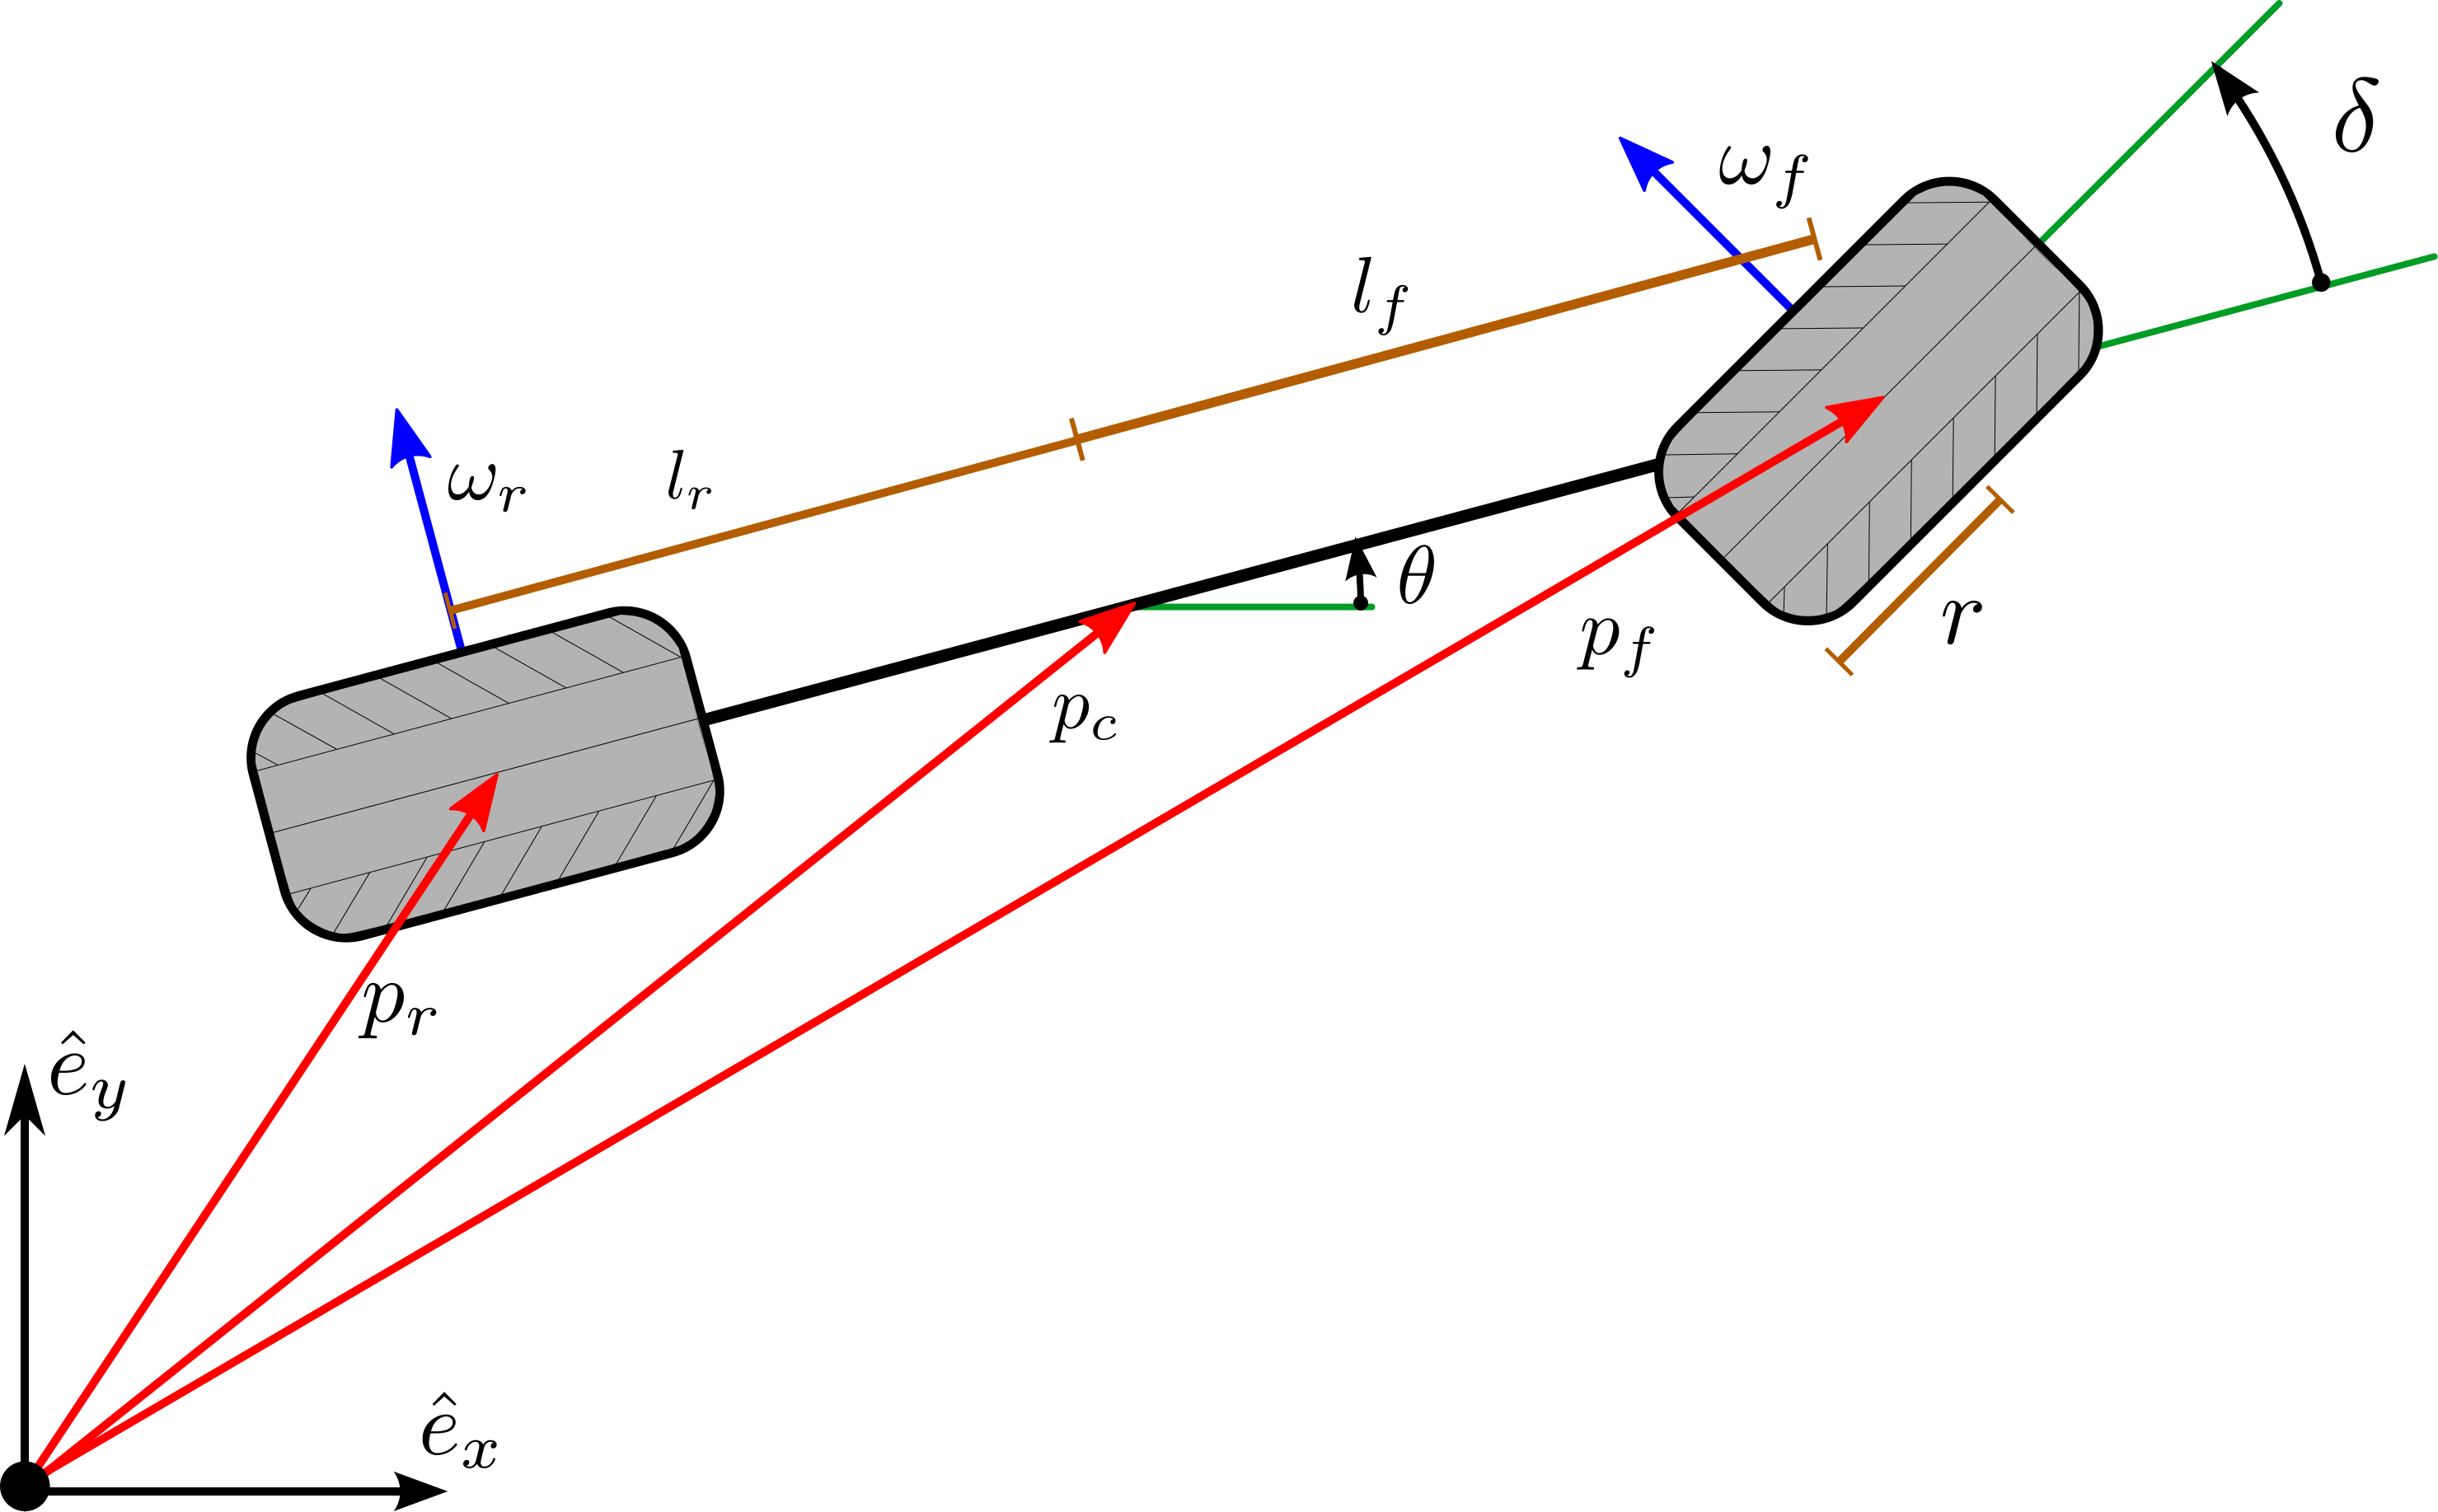
图 III.2<span id='pic_3_2'></span> 存在滑移假设的单轨模型运动学示意图。$\omega\{r, f\}$是轮胎相对于车辆的相对角速度。  

&emsp;&emsp;$F_r$和$F_f$的表达式因建模假设而异[18, 59, 60, 62]，但在任何情况下，表达式的推导都是乏味的。因此，方程(III.10)-(III.15)提供了详细的推导作为参考。  

&emsp;&emsp;地面与轮胎之间的力被建模为与轮胎在地面上滑动的速率有关。尽管质心用作配置的坐标，但仍然需要每个车轮相对于地面的速度，以确定相对速度。这三个点之间的运动学关系为
$$\begin{aligned} p_r & = p_c + 
\left( \begin{array}{c} -l_r\cos\theta \\ -l_r\sin\theta \\ 0 \end{array} \right), \\
\dot{p}_r & = \dot{p}_c + 
\left( \begin{array}{c} 0 \\ 0 \\ \dot{\theta} \end{array} \right) \times
\left( \begin{array}{c} -l_r\cos\theta \\ -l_r\sin\theta \\ 0 \end{array} \right), \\
p_f & = p_c + 
\left( \begin{array}{c} l_f\cos\theta \\ l_f\sin\theta \\ 0 \end{array} \right), \\
\dot{p}_f & = \dot{p}_c + 
\left( \begin{array}{c} 0 \\ 0 \\ \dot{\theta} \end{array} \right) \times
\left( \begin{array}{c} l_f\cos\theta \\ l_f\sin\theta \\ 0 \end{array} \right). 
\cdots\cdots III.10 \end{aligned}$$
这些运动学关系用于确定每个轮胎与地面接触点的速度$s_r$和$s_f$。这些点的速度被称为轮胎滑动速度。一般来说，$s_r \& s_f$与$\dot{p}_r \& \dot{p}_f$的区别在于轮胎的角速度。运动学关系如下：
$$\begin{aligned} s_r & = \dot{p}_r + \omega_r \times R, \\ 
s_f & = \dot{p}_f + \omega_f \times R
\cdots \cdots III.11 \end{aligned}$$
车轮的角速度如下：
$$ \omega_r = \left( \begin{array}{c} \Omega_r\sin\theta \\ -\Omega_r\cos\theta \\ 0 \end{array} \right),\ 
\omega_f = \left( \begin{array}{c} \Omega_f\sin(\theta+\delta) \\ -\Omega_f\cos(\theta+\delta) \\ 0 \end{array} \right),\ 
R = \left( \begin{array}{c} 0 \\ 0 \\ -r \end{array} \right)
\cdots \cdots III.12$$
车轮半径是标量$r$，$\Omega_r\&\Omega_f$是每个车轮相对汽车的角速度。后轮的示例如[图III.3](#pic_3_3)所示。
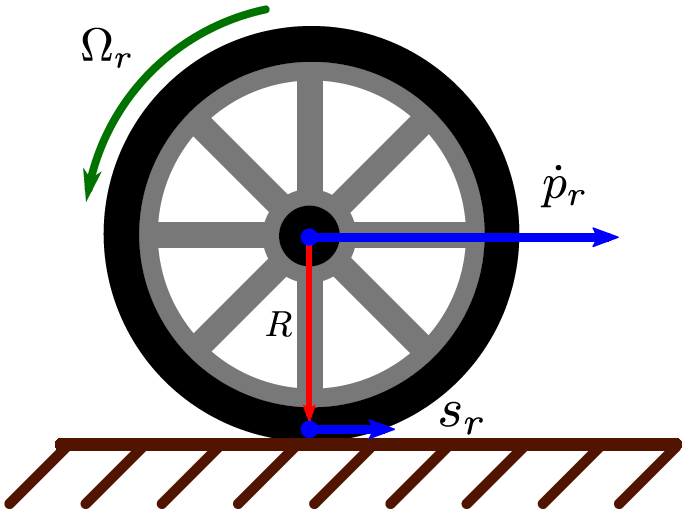
图 III.3<span id='pic_3_3'></span> 二维后轮运动学示意图，展示了车轮滑移$s_r$, 与后轮速度$\dot{p}_r$和角速度$r$的关系。一般来说,$s_r$和 $\dot{p}_r$不共线，并且可能在垂直于所绘平面的方向上具有非零分量。  

&emsp;&emsp;在静态条件下，或者当质心高度可以近似为$p_c \cdot \hat{e}_z \approx 0$时，垂直于地面的力的分量$F_{\{r,f\}} \cdot \hat{e}_z$, 可以通过静态力矩平衡计算:
$$F_f \cdot \hat{e}_z = \frac{l_rmg}{l_f+l_r}, \quad F_r \cdot \hat{e}_z = \frac{l_fmg}{l_f+l_r} \cdots  III.13 $$

&emsp;&emsp;然后使用法向力来计算每个轮胎上的牵引力, 以及轮胎特性的滑移和摩擦系数模型$\mu$。后轮上的牵引力以分量的形式给出:
$$\begin{aligned} F_r \cdot \hat{e}_x & = -\frac{(F_r \cdot \hat{e}_z)\mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) s_r}{\left\| s_r \right\|} \cdot \hat{e}_x, \\ 
F_r \cdot \hat{e}_y & = -\frac{(F_r \cdot \hat{e}_z)\mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) s_r}{\left\| s_r \right\|} \cdot \hat{e}_y
\cdots III.14 \end{aligned}$$

&emsp;&emsp;相似的表达，用下标$f$替换下标$r$，描述前轮。上式建模牵引力为与滑移反向平行, 量纲正比于法向力, 并与滑移率非线性相关(对于后轮/前轮, 滑移的量纲由$\Omega_r \cdot r$/$\Omega_f \cdot r$标准化)。联立公式(III.10)-(III.15)，可得到汽车每个车轮上的净力表达式，它关于控制变量、广义坐标及其速度。公式(III.14)与下列模型结合，

$$ \mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) = D \sin \left( C \arctan\left( B\frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) \right) \cdots III.15$$
是一种轮胎与地面相互作用的常用模型。公式(III.15)是Pacejka[63]提出的经典模型的简化版本。  

&emsp;&emsp;公式(III.14)的旋转对称性与公式(III.15)中的峰值一起, 导致轮胎可以在任何方向上施加的最大法向力。该峰值被称为摩擦圆，如图III.4所示。  

&emsp;&emsp;本节讨论的模型经常出现在无人驾驶汽车运动规划与控制的文献中。它们适用于本次调查中讨论的运动规划和控制任务。然而，较低级别的控制任务，例如电子稳定控制和主动悬架系统，通常使用更复杂的底盘、转向和传动系统模型。